### 导包

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

fm = matplotlib.font_manager.fontManager
fm.addfont("../仿宋_GB2312.TTF")
fm.addfont("../times.ttf")

# 设置中文字体和负号正常显示
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

# 设置科学出版风格的绘图
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

### 解决中文乱码

In [2]:
fm = matplotlib.font_manager.fontManager
fm.addfont("../仿宋_GB2312.TTF")
fm.addfont("../times.ttf")

# 设置中文字体和负号正常显示,启用LaTeX排版
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

In [5]:
# 读取数据
print("正在读取数据...")
df = pd.read_excel("./附件.xlsx")
print(f"数据形状: {df.shape}")
print("\n前5行数据:")
print(df.head())
print("\n数据基本信息:")
print(df.info())
print("\n数据描述性统计:")
print(df.describe())

正在读取数据...
数据形状: (1082, 31)

前5行数据:
   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

    检测孕周  ...    Y染色体浓度    X染色体浓度  13号染色体的GC含量  18号染色体的GC含量  21号染色体的GC含量  \
0  11w+6  ...  0.025936  0.038061     0.377069     0.389803     0.399399   
1  15w+6  ...  0.034887  0.059572     0.371542     0.384771     0.391706   
2  20w+1  ...  0.066171  0.075995     0.377449     0.390582     0.399480   
3  22w+6  ...  0.061192  0.052305     0.375613     0.389251     0.397212   
4  13w+6  ...  0.059230  0.059708     0.380260     0.393618     0.404868   

   被过滤掉读段数的比例  染色体的非整倍体  怀孕次数  生产次数  胎儿是否健康  

In [6]:
# 数据清洗和质量检查
print("=== 数据质量检查 ===")

# 检查缺失值
print("\n缺失值统计:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 检查重复值
print(f"\n重复行数量: {df.duplicated().sum()}")

# 检查异常值
print("\n异常值检查 (Z-score > 3):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = z_scores > 3
    if outliers.any():
        print(f"{col}: {outliers.sum()} 个异常值")

# 数据清洗
print("\n=== 数据清洗 ===")

# 处理缺失值 - 对于数值列用中位数填充，分类列用众数填充
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("缺失值已处理")

# 删除完全重复的行
df_cleaned = df.drop_duplicates()
print(f"清洗后数据形状: {df_cleaned.shape}")

def get_yz(value):
    return int(value.split('+')[0][::-1][1:][::-1])

def get_yz_r(value):
    if "+" in value:
        return int(value.split('+')[1])
    else:
        return 0

df_cleaned['孕周'] = df_cleaned['检测孕周'].apply(get_yz)
df_cleaned['孕周_日'] = df_cleaned['检测孕周'].apply(get_yz_r)

# 保存清洗后的数据
df_cleaned.to_csv("cleaned_data.csv", index=False, encoding='utf-8-sig')
print("清洗后的数据已保存为 'cleaned_data.csv'")

=== 数据质量检查 ===

缺失值统计:
末次月经         12
染色体的非整倍体    956
dtype: int64

重复行数量: 0

异常值检查 (Z-score > 3):
年龄: 11 个异常值
身高: 4 个异常值
体重: 13 个异常值
孕妇BMI: 14 个异常值
原始读段数: 9 个异常值
在参考基因组上比对的比例: 11 个异常值
重复读段的比例: 17 个异常值
唯一比对的读段数  : 10 个异常值
GC含量: 13 个异常值
13号染色体的Z值: 6 个异常值
18号染色体的Z值: 7 个异常值
X染色体的Z值: 10 个异常值
Y染色体的Z值: 19 个异常值
Y染色体浓度: 8 个异常值
X染色体浓度: 7 个异常值
13号染色体的GC含量: 14 个异常值
18号染色体的GC含量: 14 个异常值
21号染色体的GC含量: 11 个异常值
被过滤掉读段数的比例: 10 个异常值
生产次数: 12 个异常值

=== 数据清洗 ===
缺失值已处理
清洗后数据形状: (1082, 31)
清洗后的数据已保存为 'cleaned_data.csv'


## Code1

正在绘制散点图矩阵...


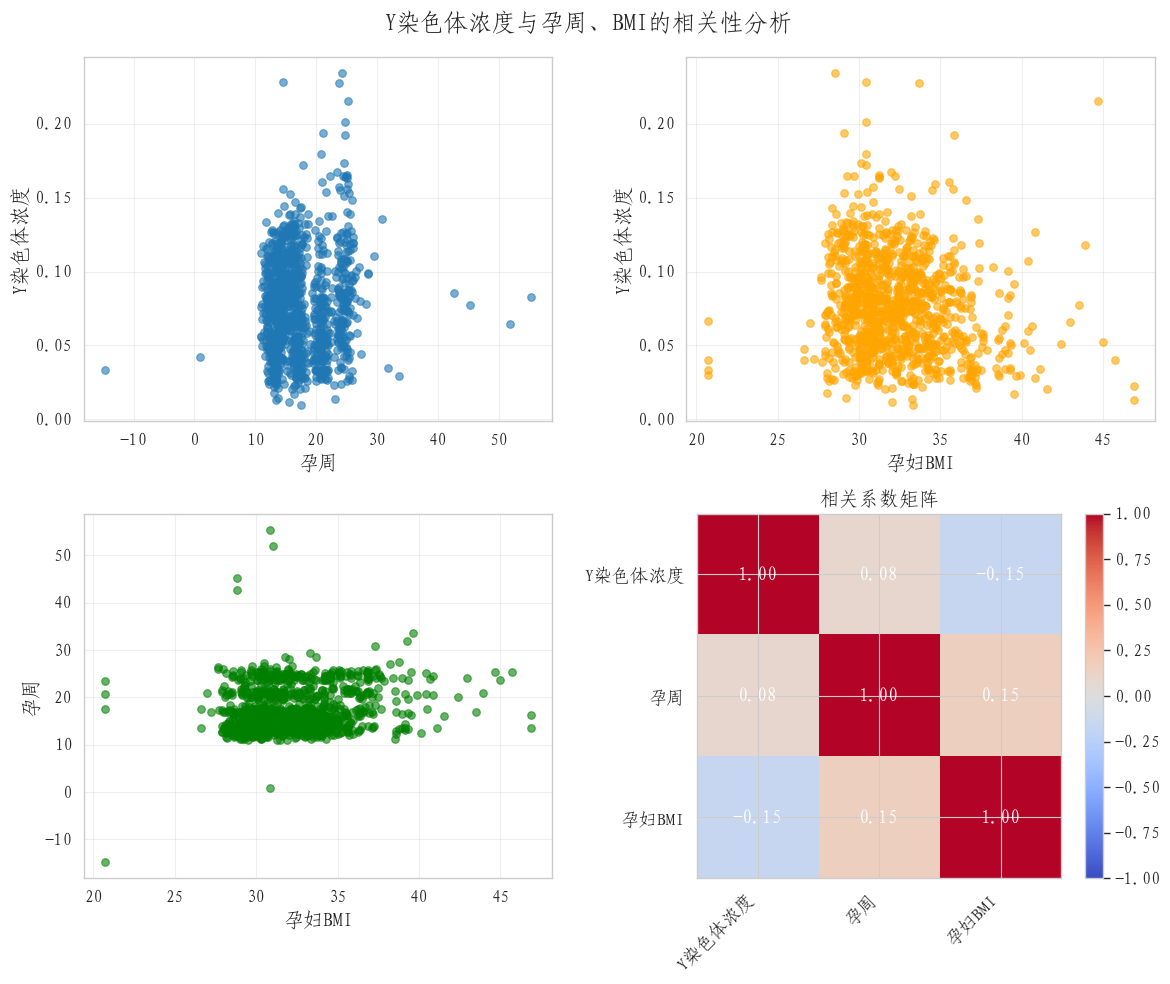

散点图矩阵已保存为 'y_chromosome_correlation_matrix.png'


In [7]:
# 1) 绘制Y染色体密度与孕周、BMI的散点图矩阵
print("正在绘制散点图矩阵...")

# 计算孕周（从末次月经到检测日期的周数）
df_cleaned['检测日期'] = pd.to_datetime(df_cleaned['检测日期'], format='%Y%m%d')
df_cleaned['末次月经'] = pd.to_datetime(df_cleaned['末次月经'])
df_cleaned['孕周'] = (df_cleaned['检测日期'] - df_cleaned['末次月经']).dt.days / 7

# 选择相关变量
scatter_vars = ['Y染色体浓度', '孕周', '孕妇BMI']
scatter_df = df_cleaned[scatter_vars].dropna()

# 绘制散点图矩阵
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Y染色体浓度与孕周、BMI的相关性分析')

# Y染色体浓度 vs 孕周
axes[0,0].scatter(scatter_df['孕周'], scatter_df['Y染色体浓度'], alpha=0.6, s=30)
axes[0,0].set_xlabel('孕周')
axes[0,0].set_ylabel('Y染色体浓度')
axes[0,0].grid(True, alpha=0.3)

# Y染色体浓度 vs BMI
axes[0,1].scatter(scatter_df['孕妇BMI'], scatter_df['Y染色体浓度'], alpha=0.6, s=30, color='orange')
axes[0,1].set_xlabel('孕妇BMI')
axes[0,1].set_ylabel('Y染色体浓度')
axes[0,1].grid(True, alpha=0.3)

# 孕周 vs BMI
axes[1,0].scatter(scatter_df['孕妇BMI'], scatter_df['孕周'], alpha=0.6, s=30, color='green')
axes[1,0].set_xlabel('孕妇BMI')
axes[1,0].set_ylabel('孕周')
axes[1,0].grid(True, alpha=0.3)

# 相关系数矩阵热图（简化版）
corr_matrix = scatter_df.corr()
im = axes[1,1].imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
axes[1,1].set_xticks(range(len(corr_matrix.columns)))
axes[1,1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
axes[1,1].set_yticks(range(len(corr_matrix.columns)))
axes[1,1].set_yticklabels(corr_matrix.columns)

# 添加相关系数值
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        axes[1,1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                      ha='center', va='center', color='white', fontweight='bold')

plt.colorbar(im, ax=axes[1,1])
axes[1,1].set_title('相关系数矩阵')

plt.tight_layout()
plt.savefig('y_chromosome_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("散点图矩阵已保存为 'y_chromosome_correlation_matrix.png'")

正在绘制BMI分组曲线...


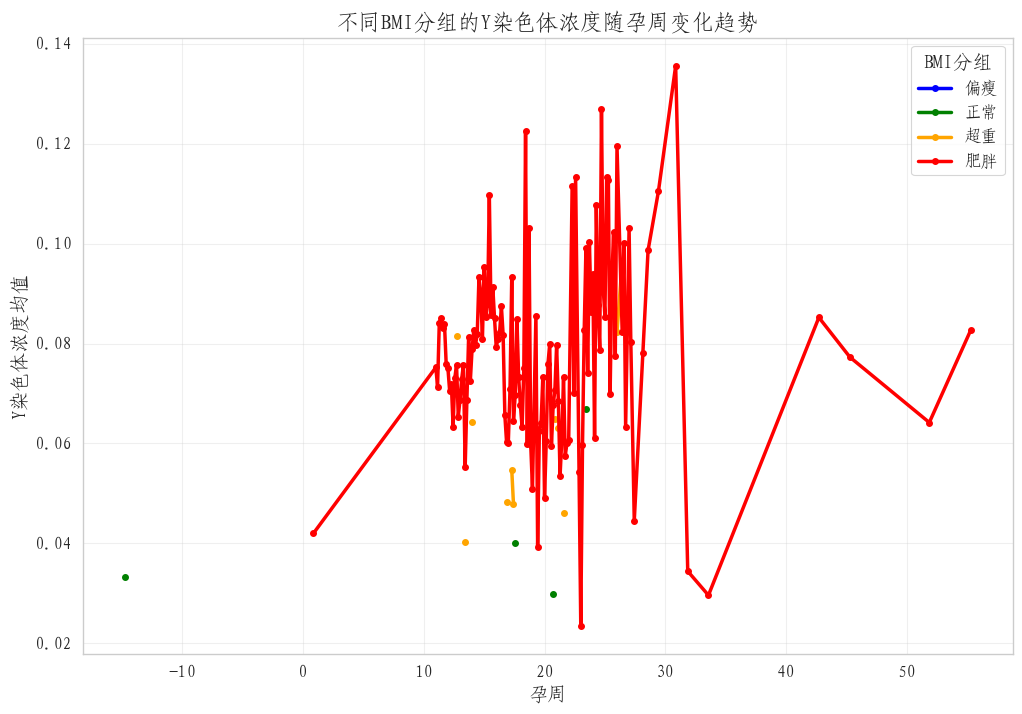

BMI分组曲线图已保存为 'y_chromosome_by_bmi_week.png'


In [8]:
# 2) 绘制不同BMI分组的Y染色体密度随孕周变化曲线
print("正在绘制BMI分组曲线...")

# 创建BMI分组
bmi_bins = [0, 18.5, 24, 28, 50]  # 偏瘦, 正常, 超重, 肥胖
df_cleaned['BMI分组'] = pd.cut(df_cleaned['孕妇BMI'], bins=bmi_bins, 
                              labels=['偏瘦', '正常', '超重', '肥胖'])

# 按BMI分组和孕周分组计算Y染色体浓度的均值
bmi_week_analysis = df_cleaned.groupby(['BMI分组', '孕周'])['Y染色体浓度'].mean().reset_index()

plt.figure(figsize=(12, 8))

# 为每个BMI分组绘制曲线
bmi_groups = bmi_week_analysis['BMI分组'].unique()
colors = ['blue', 'green', 'orange', 'red']

for i, group in enumerate(bmi_groups):
    group_data = bmi_week_analysis[bmi_week_analysis['BMI分组'] == group]
    if len(group_data) > 1:  # 确保有足够的数据点
        plt.plot(group_data['孕周'], group_data['Y染色体浓度'], 
                label=f'{group}', color=colors[i], linewidth=2.5, marker='o', markersize=4)

plt.xlabel('孕周', fontsize=14)
plt.ylabel('Y染色体浓度均值', fontsize=14)
plt.title('不同BMI分组的Y染色体浓度随孕周变化趋势', fontsize=16, fontweight='bold')
plt.legend(title='BMI分组', fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('y_chromosome_by_bmi_week.png', dpi=300, bbox_inches='tight')
plt.show()

print("BMI分组曲线图已保存为 'y_chromosome_by_bmi_week.png'")

正在绘制染色体Z值分布直方图...


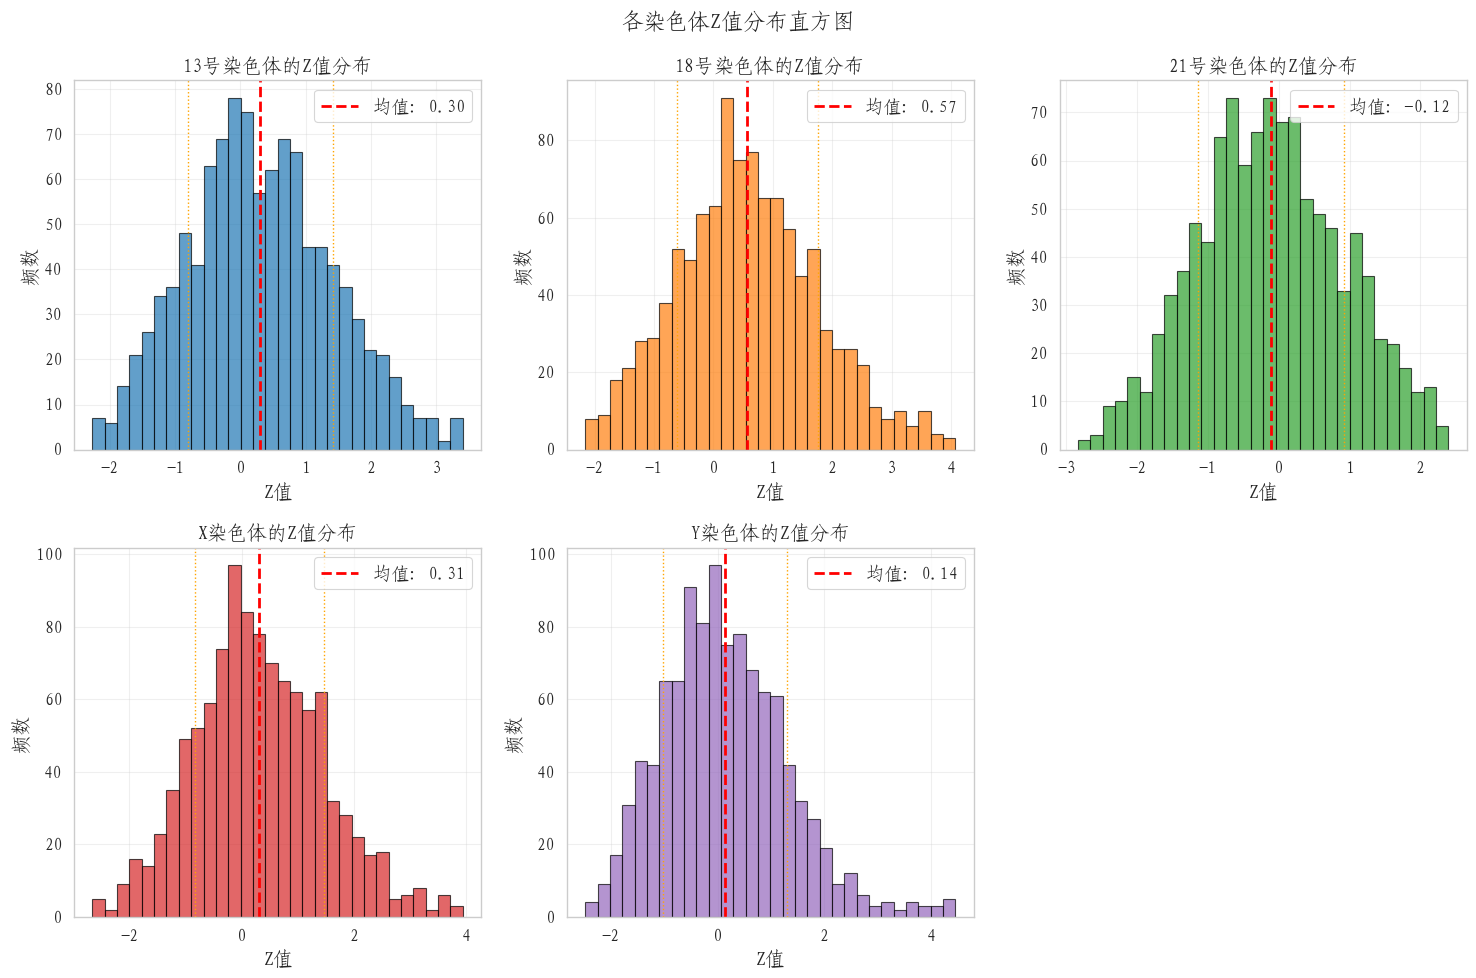

染色体Z值分布直方图已保存为 'chromosome_zvalue_distribution.png'


In [9]:
# 3) 绘制各染色体Z值的分布直方图
print("正在绘制染色体Z值分布直方图...")

# 选择染色体Z值列
z_value_cols = ['13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('各染色体Z值分布直方图', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(z_value_cols):
    if i < len(axes):
        # 移除极端异常值以更好地显示分布
        data = df_cleaned[col].dropna()
        q1 = data.quantile(0.01)
        q3 = data.quantile(0.99)
        filtered_data = data[(data >= q1) & (data <= q3)]
        
        axes[i].hist(filtered_data, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[i].set_xlabel('Z值')
        axes[i].set_ylabel('频数')
        axes[i].set_title(f'{col}分布')
        axes[i].grid(True, alpha=0.3)
        
        # 添加统计信息
        mean_val = filtered_data.mean()
        std_val = filtered_data.std()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_val:.2f}')
        axes[i].axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1)
        axes[i].axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1)
        axes[i].legend()

# 移除多余的子图
if len(z_value_cols) < len(axes):
    for j in range(len(z_value_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('chromosome_zvalue_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("染色体Z值分布直方图已保存为 'chromosome_zvalue_distribution.png'")

正在绘制质量控制指标分布图...


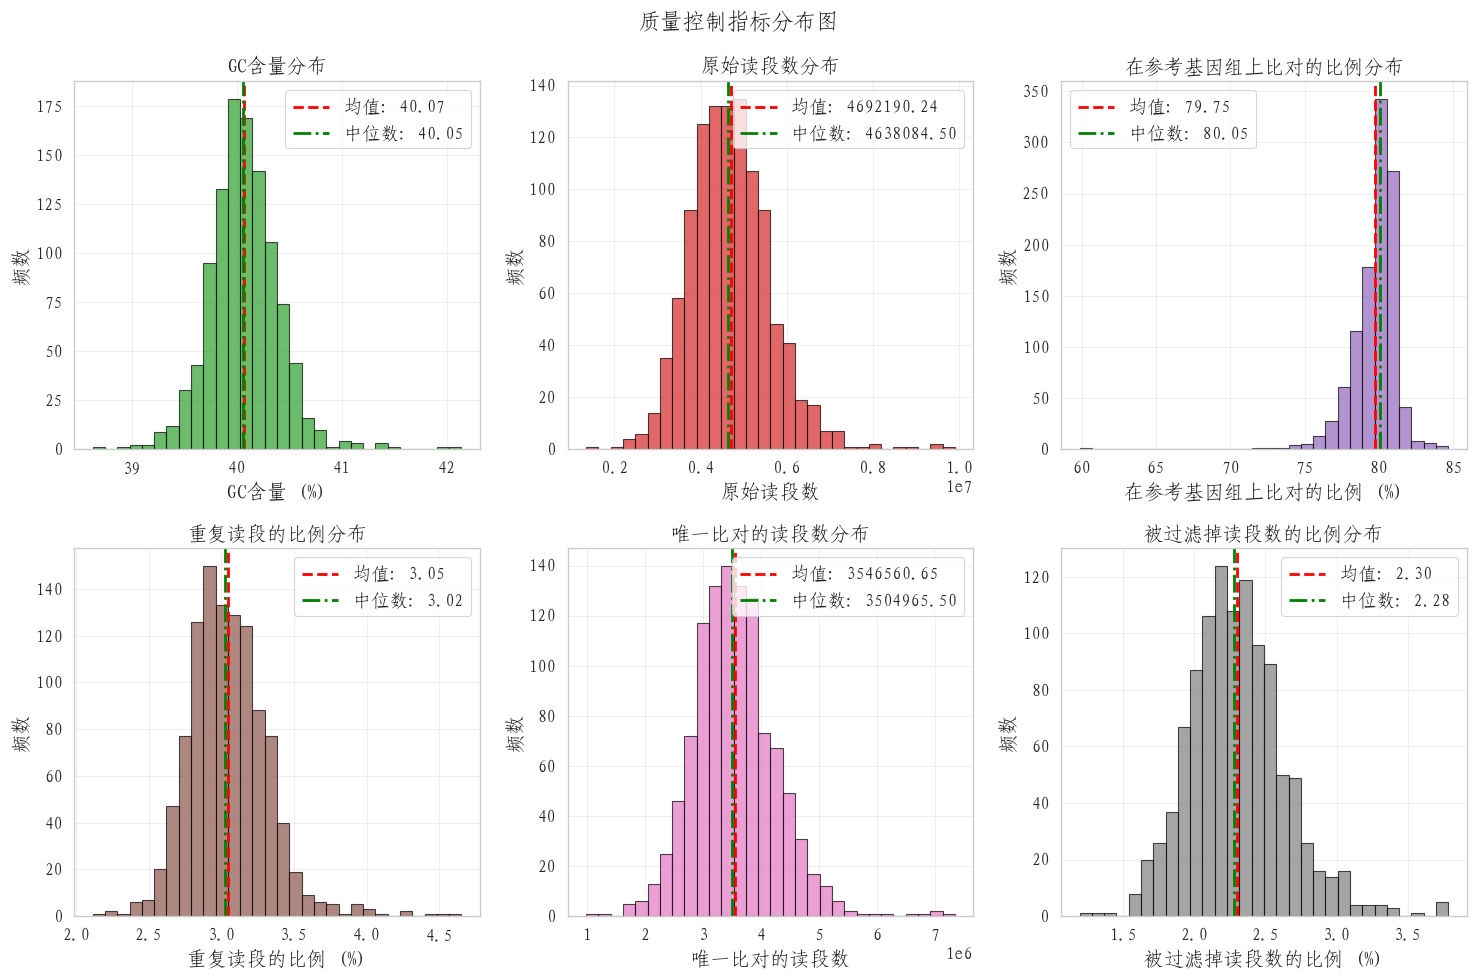

质量控制指标分布图已保存为 'quality_control_distribution.png'


In [10]:
# 4) 绘制GC含量、读段数等质量控制指标的分布图（修正版）
print("正在绘制质量控制指标分布图...")

# 修正后的质量控制相关列（注意：'唯一比对的读段数  '后面有空格）
qc_cols = ['GC含量', '原始读段数', '在参考基因组上比对的比例', 
          '重复读段的比例', '唯一比对的读段数  ', '被过滤掉读段数的比例']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('质量控制指标分布图', fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(qc_cols):
    if i < len(axes):
        data = df_cleaned[col].dropna()
        
        # 对于比例数据，使用百分比显示
        if '比例' in col or '含量' in col:
            data = data * 100  # 转换为百分比
            xlabel = f'{col.strip()} (%)'  # 去除列名末尾空格
        else:
            xlabel = col.strip()  # 去除列名末尾空格
        
        axes[i].hist(data, bins=30, alpha=0.7, color=f'C{i+2}', edgecolor='black')
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel('频数')
        axes[i].set_title(f'{col.strip()}分布')  # 去除列名末尾空格
        axes[i].grid(True, alpha=0.3)
        
        # 添加统计信息
        mean_val = data.mean()
        median_val = data.median()
        axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'均值: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-.', linewidth=2, label=f'中位数: {median_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.savefig('quality_control_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("质量控制指标分布图已保存为 'quality_control_distribution.png'")

In [11]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

print("Original data shape:", df.shape)

# Convert '检测孕周' from string format like '11w+6' to numeric weeks
def convert_pregnancy_week(week_str):
    if pd.isna(week_str):
        return np.nan
    try:
        # Handle formats like '11w+6' or '13w'
        if 'w+' in week_str:
            weeks, days = week_str.split('w+')
            return float(weeks) + float(days)/7.0
        elif 'w' in week_str:
            weeks = week_str.replace('w', '')
            return float(weeks)
        else:
            return float(week_str)
    except:
        return np.nan

# Apply conversion
df['检测孕周_numeric'] = df['检测孕周'].apply(convert_pregnancy_week)
print(f"Converted '检测孕周' values. Sample: {df['检测孕周_numeric'].dropna().unique()[:5]}")

# Convert '怀孕次数' from categorical to numeric
def convert_pregnancy_count(count_str):
    if pd.isna(count_str):
        return np.nan
    try:
        if count_str == '≥3':
            return 3.0
        else:
            return float(count_str)
    except:
        return np.nan

df['怀孕次数_numeric'] = df['怀孕次数'].apply(convert_pregnancy_count)
print(f"Converted '怀孕次数' values. Sample: {df['怀孕次数_numeric'].dropna().unique()}")

# Select numeric columns for correlation analysis
numeric_cols = ['年龄', '身高', '体重', '检测孕周_numeric', '孕妇BMI', '原始读段数', 
               '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 
               'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 
               'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度',
               '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
               '被过滤掉读段数的比例', '怀孕次数_numeric', '生产次数']

print("\nSelected numeric columns for correlation analysis:")
for col in numeric_cols:
    if col in df.columns:
        print(f"{col}: {df[col].dtype}")
    else:
        print(f"{col}: Column not found")

# Create a cleaned dataframe with only numeric values
df_numeric = df[numeric_cols].copy()
print(f"\nNumeric dataframe shape: {df_numeric.shape}")
print(f"Missing values per column:")
print(df_numeric.isnull().sum())

Original data shape: (1082, 33)
Converted '检测孕周' values. Sample: [11.85714286 15.85714286 20.14285714 22.85714286 13.85714286]
Converted '怀孕次数' values. Sample: [1. 2. 3.]

Selected numeric columns for correlation analysis:
年龄: int64
身高: float64
体重: float64
检测孕周_numeric: float64
孕妇BMI: float64
原始读段数: int64
在参考基因组上比对的比例: float64
重复读段的比例: float64
唯一比对的读段数  : int64
GC含量: float64
13号染色体的Z值: float64
18号染色体的Z值: float64
21号染色体的Z值: float64
X染色体的Z值: float64
Y染色体的Z值: float64
Y染色体浓度: float64
X染色体浓度: float64
13号染色体的GC含量: float64
18号染色体的GC含量: float64
21号染色体的GC含量: float64
被过滤掉读段数的比例: float64
怀孕次数_numeric: float64
生产次数: int64

Numeric dataframe shape: (1082, 23)
Missing values per column:
年龄              0
身高              0
体重              0
检测孕周_numeric    1
孕妇BMI           0
原始读段数           0
在参考基因组上比对的比例    0
重复读段的比例         0
唯一比对的读段数        0
GC含量            0
13号染色体的Z值       0
18号染色体的Z值       0
21号染色体的Z值       0
X染色体的Z值         0
Y染色体的Z值         0
Y染色体浓度          0
X染色体浓度          0
13号染色体的GC含量 

Data shape after cleaning: (1081, 23)
Correlation matrix calculated successfully!
Correlation matrix shape: (23, 23)
正在绘制变量间相关性热图...


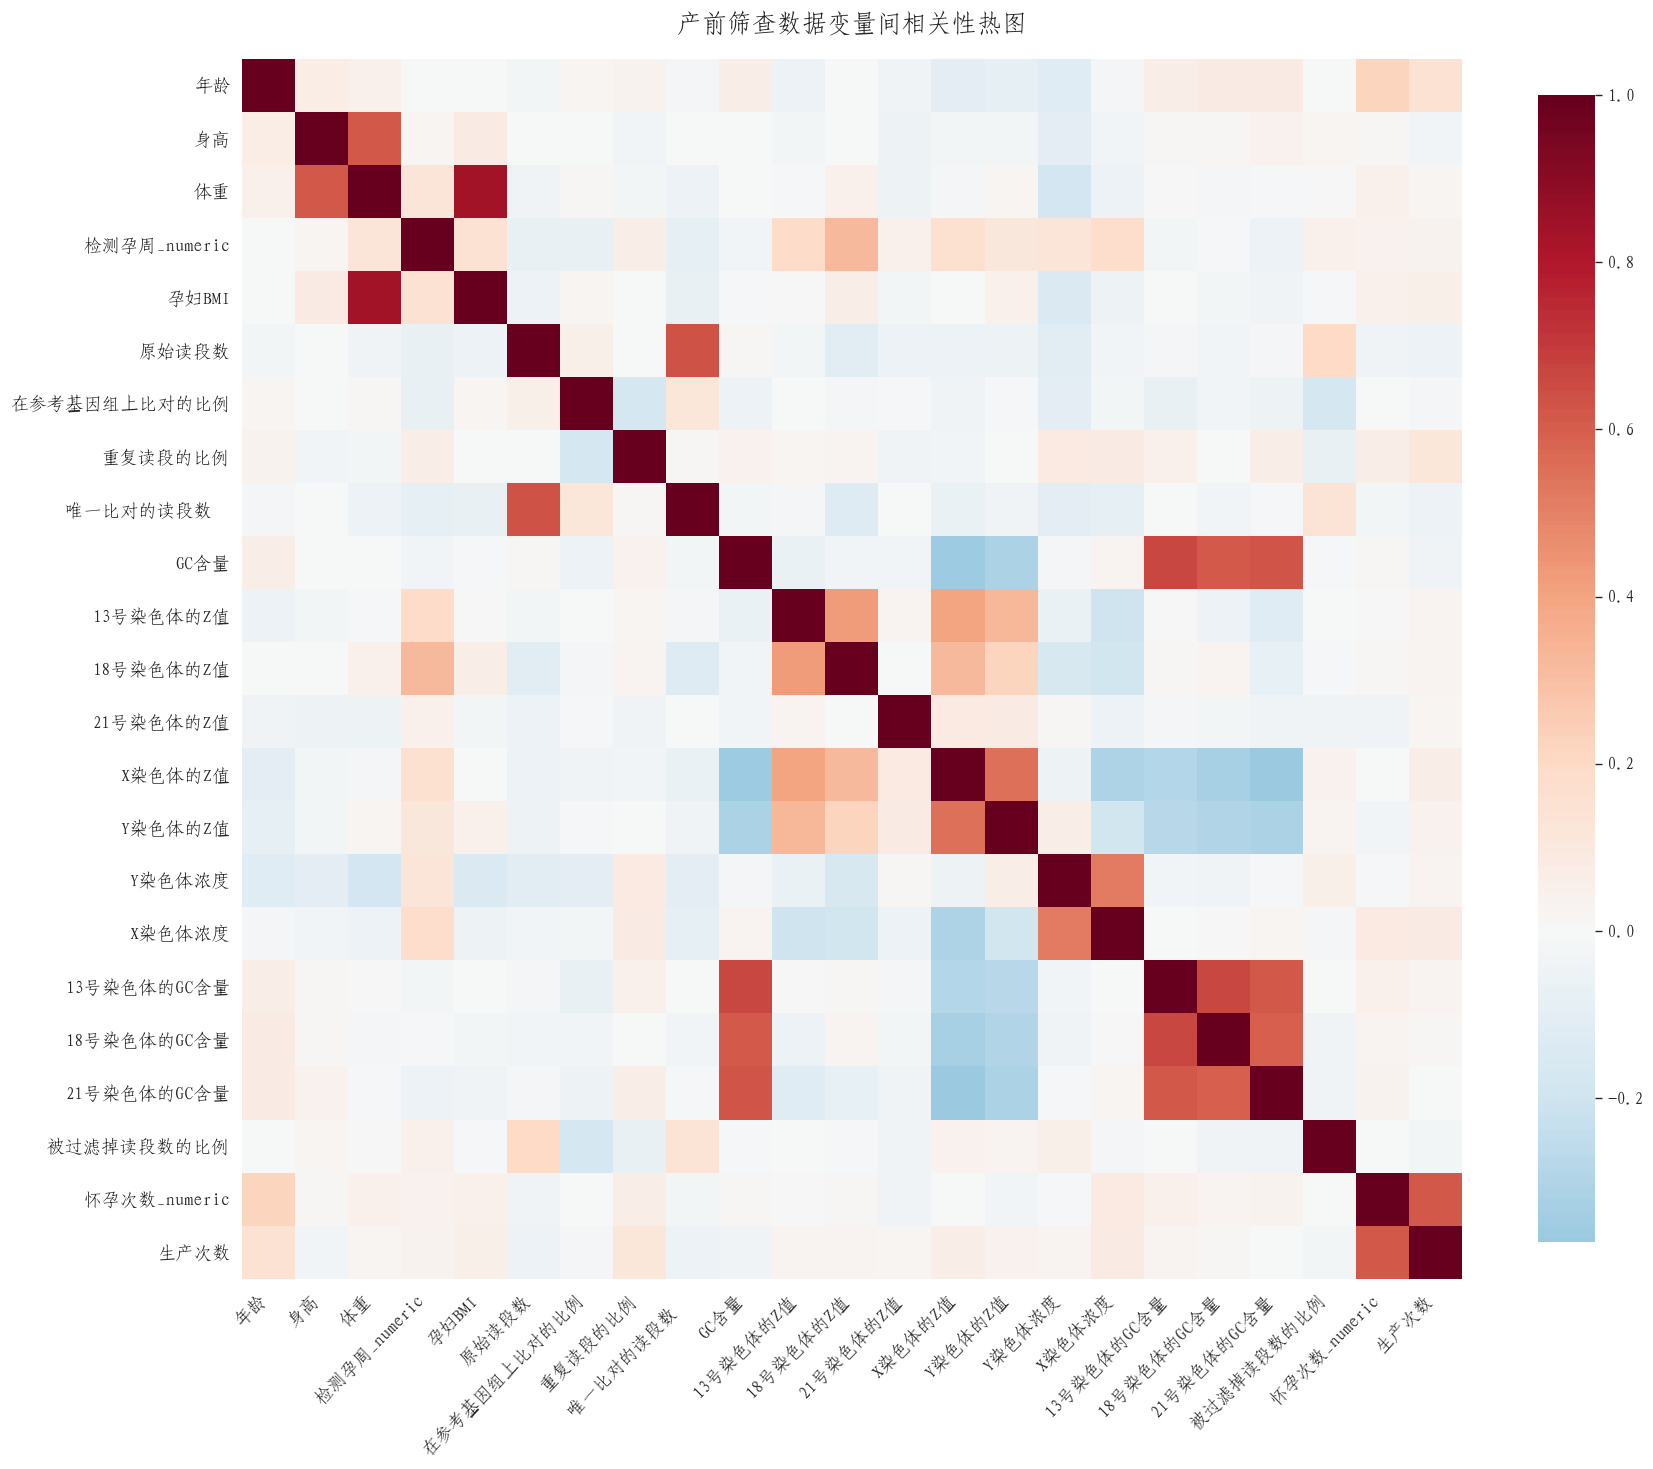

相关性热图已保存为 'correlation_heatmap.png'

高度相关的变量对（|相关系数| > 0.7）:
体重 - 孕妇BMI: 0.835

中度相关的变量对（|相关系数| > 0.5）:
GC含量 - 13号染色体的GC含量: 0.667
13号染色体的GC含量 - 18号染色体的GC含量: 0.663
原始读段数 - 唯一比对的读段数  : 0.640
GC含量 - 21号染色体的GC含量: 0.625
身高 - 体重: 0.619
怀孕次数_numeric - 生产次数: 0.618
13号染色体的GC含量 - 21号染色体的GC含量: 0.615
GC含量 - 18号染色体的GC含量: 0.613
18号染色体的GC含量 - 21号染色体的GC含量: 0.595
X染色体的Z值 - Y染色体的Z值: 0.553
Y染色体浓度 - X染色体浓度: 0.519


In [12]:
# Now calculate the correlation matrix and create the heatmap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set Chinese font support
plt.rcParams['font.sans-serif'] = ["FangSong_GB2312", "times"]
plt.rcParams['axes.unicode_minus'] = False

# Load the cleaned data with converted columns
df = pd.read_csv('cleaned_data.csv')

# Convert the problematic columns again (since we're reloading)
def convert_pregnancy_week(week_str):
    if pd.isna(week_str):
        return np.nan
    try:
        if 'w+' in week_str:
            weeks, days = week_str.split('w+')
            return float(weeks) + float(days)/7.0
        elif 'w' in week_str:
            weeks = week_str.replace('w', '')
            return float(weeks)
        else:
            return float(week_str)
    except:
        return np.nan

def convert_pregnancy_count(count_str):
    if pd.isna(count_str):
        return np.nan
    try:
        if count_str == '≥3':
            return 3.0
        else:
            return float(count_str)
    except:
        return np.nan

df['检测孕周_numeric'] = df['检测孕周'].apply(convert_pregnancy_week)
df['怀孕次数_numeric'] = df['怀孕次数'].apply(convert_pregnancy_count)

# Select numeric columns for correlation analysis
numeric_cols = ['年龄', '身高', '体重', '检测孕周_numeric', '孕妇BMI', '原始读段数', 
               '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 
               'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 
               'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度',
               '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
               '被过滤掉读段数的比例', '怀孕次数_numeric', '生产次数']

# Create numeric dataframe and drop any remaining missing values
df_numeric = df[numeric_cols].copy()
df_numeric_clean = df_numeric.dropna()

print(f"Data shape after cleaning: {df_numeric_clean.shape}")

# Calculate correlation matrix
correlation_matrix = df_numeric_clean.corr()

print("Correlation matrix calculated successfully!")
print(f"Correlation matrix shape: {correlation_matrix.shape}")

# 5) 绘制变量间相关性热图
print("正在绘制变量间相关性热图...")

plt.figure(figsize=(18, 16))

# Use seaborn to draw heatmap
sns.heatmap(correlation_matrix, 
           annot=False,  # Don't show specific values (too many variables)
           cmap='RdBu_r', 
           center=0,
           square=True,
           cbar_kws={'shrink': 0.8})

plt.title('产前筛查数据变量间相关性热图', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("相关性热图已保存为 'correlation_heatmap.png'")

# Display highly correlated variable pairs (|correlation coefficient| > 0.7)
print("\n高度相关的变量对（|相关系数| > 0.7）:")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_value))

# Sort by absolute correlation coefficient
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("没有找到高度相关的变量对（|相关系数| > 0.7）")

# Also show moderately correlated pairs (|correlation coefficient| > 0.5)
print("\n中度相关的变量对（|相关系数| > 0.5）:")
moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) <= 0.7:
            moderate_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_value))

moderate_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if moderate_corr_pairs:
    for pair in moderate_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("没有找到中度相关的变量对（|相关系数| > 0.5）")

开始构建机器学习模型预测胎儿健康状况...

胎儿健康状况分布:
胎儿是否健康
是    1044
否      38
Name: count, dtype: int64

各类样本数量:
是: 1044 样本
否: 38 样本

胎儿健康状况编码映射:
否 -> 0
是 -> 1

特征矩阵形状: (1081, 23)
目标变量形状: (1081,)

清洗后数据的胎儿健康状况分布:
胎儿是否健康_encoded
1    1043
0      38
Name: count, dtype: int64
训练集形状: (756, 23)
测试集形状: (325, 23)

SMOTE处理后训练集形状: (1458, 23)
SMOTE处理后类别分布: 胎儿是否健康_encoded
1    729
0    729
Name: count, dtype: int64

开始训练模型...
正在训练 Random Forest...
Random Forest 准确率: 0.972 ROC AUC: 0.938
正在训练 Logistic Regression...
Logistic Regression 准确率: 0.806 ROC AUC: 0.793
正在训练 SVM...
SVM 准确率: 0.960 ROC AUC: 0.804

=== 模型性能比较 ===

Random Forest:
准确率: 0.972
ROC AUC: 0.938
分类报告:
              precision    recall  f1-score     support
否              0.666667  0.363636  0.470588   11.000000
是              0.978056  0.993631  0.985782  314.000000
accuracy       0.972308  0.972308  0.972308    0.972308
macro avg      0.822362  0.678633  0.728185  325.000000
weighted avg   0.967517  0.972308  0.968345  325.000000

Logistic Regression:

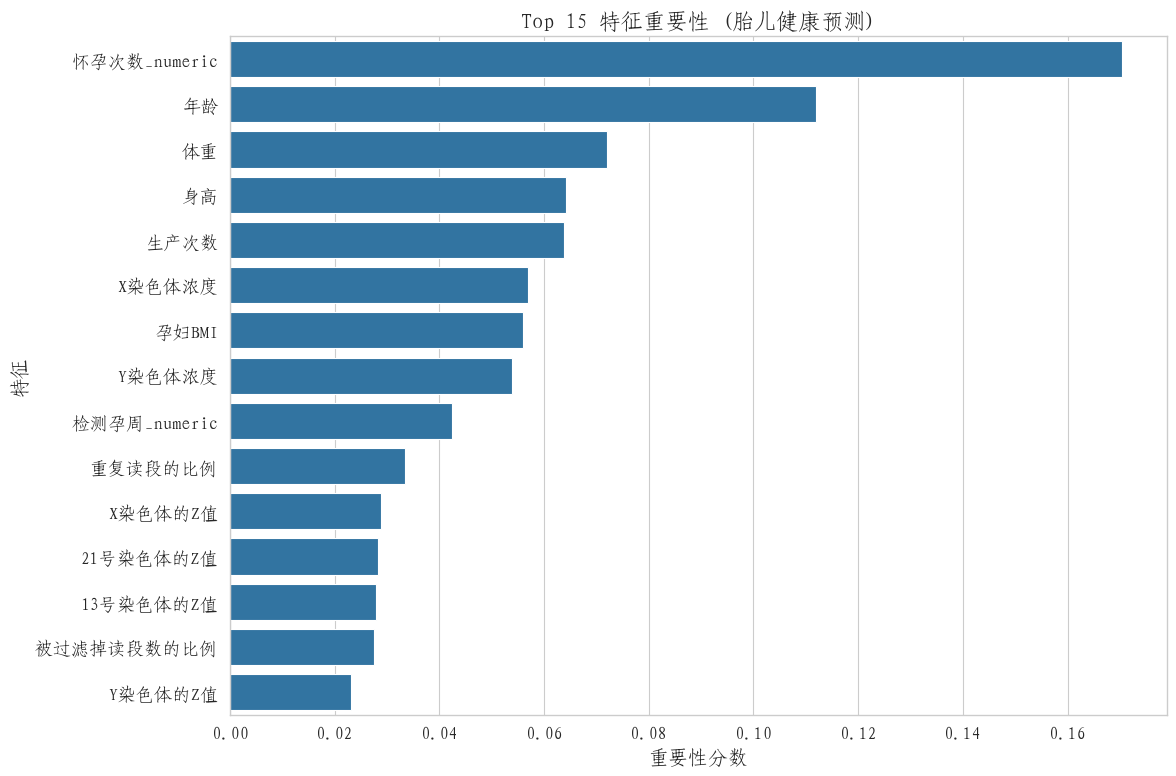

特征重要性图已保存为 'feature_importance_fetal_health.png'

模型已保存为 'fetal_health_prediction_model.pkl'
数据标准化器已保存为 'scaler_fetal_health.pkl'
标签编码器已保存为 'label_encoder_fetal_health.pkl'


<Figure size 800x600 with 0 Axes>

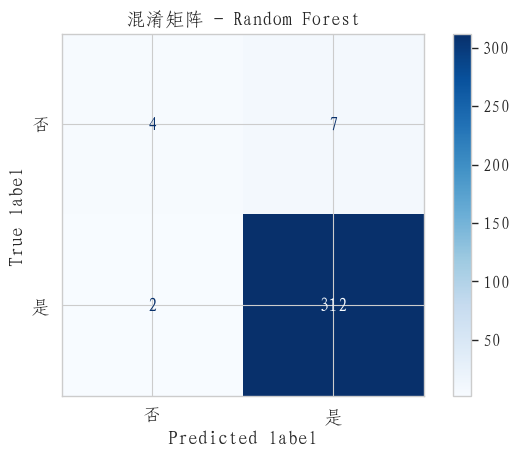

混淆矩阵图已保存为 'confusion_matrix_fetal_health.png'


In [13]:
# 6) 机器学习模型构建与评估 - 使用正确的目标变量
print("开始构建机器学习模型预测胎儿健康状况...")

# First, let's check the distribution of the target variable
print("\n胎儿健康状况分布:")
health_distribution = df['胎儿是否健康'].value_counts()
print(health_distribution)

# Check if we have enough samples for each class
print(f"\n各类样本数量:")
for health_status, count in health_distribution.items():
    print(f"{health_status}: {count} 样本")

# For machine learning, we need to encode the target variable
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['胎儿是否健康_encoded'] = le.fit_transform(df['胎儿是否健康'])

print("\n胎儿健康状况编码映射:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} -> {i}")

# Prepare the numeric features (we already have df_numeric_clean from previous steps)
# Let's recreate it to ensure consistency
def convert_pregnancy_week(week_str):
    if pd.isna(week_str):
        return np.nan
    try:
        if 'w+' in week_str:
            weeks, days = week_str.split('w+')
            return float(weeks) + float(days)/7.0
        elif 'w' in week_str:
            weeks = week_str.replace('w', '')
            return float(weeks)
        else:
            return float(week_str)
    except:
        return np.nan

def convert_pregnancy_count(count_str):
    if pd.isna(count_str):
        return np.nan
    try:
        if count_str == '≥3':
            return 3.0
        else:
            return float(count_str)
    except:
        return np.nan

df['检测孕周_numeric'] = df['检测孕周'].apply(convert_pregnancy_week)
df['怀孕次数_numeric'] = df['怀孕次数'].apply(convert_pregnancy_count)

# Select numeric columns for machine learning
numeric_cols = ['年龄', '身高', '体重', '检测孕周_numeric', '孕妇BMI', '原始读段数', 
               '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 
               'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 
               'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度',
               '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
               '被过滤掉读段数的比例', '怀孕次数_numeric', '生产次数']

# Create numeric dataframe and drop any missing values
df_numeric = df[numeric_cols].copy()
df_numeric_clean = df_numeric.dropna()

print(f"\n特征矩阵形状: {df_numeric_clean.shape}")

# Prepare features and target
X = df_numeric_clean
y = df.loc[df_numeric_clean.index, '胎儿是否健康_encoded']

print(f"目标变量形状: {y.shape}")

# Check class distribution in the cleaned data
print("\n清洗后数据的胎儿健康状况分布:")
print(pd.Series(y).value_counts())

# Since we have class imbalance, we'll use appropriate techniques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"\nSMOTE处理后训练集形状: {X_train_resampled.shape}")
print("SMOTE处理后类别分布:", pd.Series(y_train_resampled).value_counts())

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)  # Added probability for ROC
}

results = {}

print("\n开始训练模型...")
for name, model in models.items():
    print(f"正在训练 {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name} 准确率: {accuracy:.3f}", f"ROC AUC: {roc_auc:.3f}" if roc_auc is not None else "")

# Display detailed results
print("\n=== 模型性能比较 ===")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"准确率: {result['accuracy']:.3f}")
    if result['roc_auc'] is not None:
        print(f"ROC AUC: {result['roc_auc']:.3f}")
    print("分类报告:")
    report_df = pd.DataFrame(result['report']).transpose()
    print(report_df[['precision', 'recall', 'f1-score', 'support']])

# Find the best model based on accuracy
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n最佳模型: {best_model_name} (准确率: {results[best_model_name]['accuracy']:.3f})")

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print("\n特征重要性排序:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 特征重要性 (胎儿健康预测)', fontsize=16, fontweight='bold')
    plt.xlabel('重要性分数')
    plt.ylabel('特征')
    plt.tight_layout()
    plt.savefig('feature_importance_fetal_health.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("特征重要性图已保存为 'feature_importance_fetal_health.png'")

# Save the best model
import joblib
joblib.dump(best_model, 'fetal_health_prediction_model.pkl')
joblib.dump(scaler, 'scaler_fetal_health.pkl')
joblib.dump(le, 'label_encoder_fetal_health.pkl')

print("\n模型已保存为 'fetal_health_prediction_model.pkl'")
print("数据标准化器已保存为 'scaler_fetal_health.pkl'")
print("标签编码器已保存为 'label_encoder_fetal_health.pkl'")

# Create a confusion matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, 
                                     display_labels=le.classes_, 
                                     cmap='Blues')
plt.title(f'混淆矩阵 - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_fetal_health.png', dpi=300, bbox_inches='tight')
plt.show()
print("混淆矩阵图已保存为 'confusion_matrix_fetal_health.png'")

开始构建机器学习模型预测胎儿健康状况...

胎儿健康状况分布:
胎儿是否健康
是    1044
否      38
Name: count, dtype: int64

各类样本数量:
是: 1044 样本
否: 38 样本

胎儿健康状况编码映射:
否 -> 0
是 -> 1

特征矩阵形状: (1081, 23)
目标变量形状: (1081,)

清洗后数据的胎儿健康状况分布:
胎儿是否健康_encoded
1    1043
0      38
Name: count, dtype: int64
训练集形状: (756, 23)
测试集形状: (325, 23)

开始训练模型...
正在训练 Random Forest...
Random Forest 准确率: 0.972 ROC AUC: 0.942
正在训练 Logistic Regression...
Logistic Regression 准确率: 0.806 ROC AUC: 0.802
正在训练 SVM...
SVM 准确率: 0.966 ROC AUC: 0.834

=== 模型性能比较 ===

Random Forest:
准确率: 0.972
ROC AUC: 0.942
分类报告:
              precision    recall  f1-score     support
否              1.000000  0.181818  0.307692   11.000000
是              0.972136  1.000000  0.985871  314.000000
accuracy       0.972308  0.972308  0.972308    0.972308
macro avg      0.986068  0.590909  0.646782  325.000000
weighted avg   0.973079  0.972308  0.962918  325.000000

Logistic Regression:
准确率: 0.806
ROC AUC: 0.802
分类报告:
              precision    recall  f1-score     support
否          

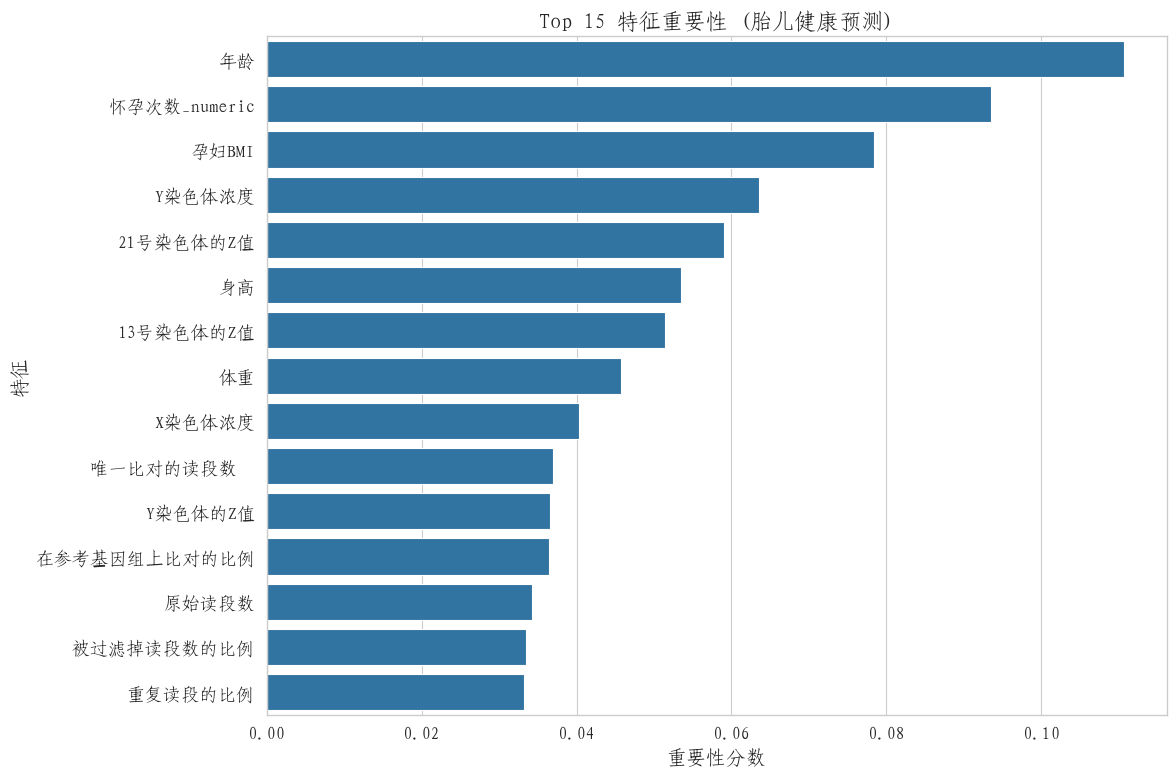

特征重要性图已保存为 'feature_importance_fetal_health.png'

模型已保存为 'fetal_health_prediction_model.pkl'
数据标准化器已保存为 'scaler_fetal_health.pkl'
标签编码器已保存为 'label_encoder_fetal_health.pkl'


<Figure size 800x600 with 0 Axes>

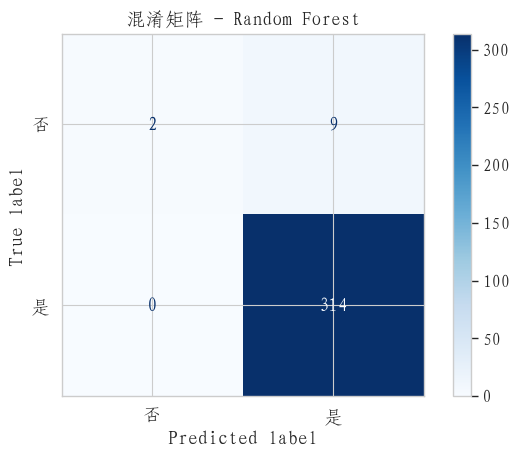

混淆矩阵图已保存为 'confusion_matrix_fetal_health.png'


In [14]:
# 6) 机器学习模型构建与评估 - 使用正确的目标变量 (修正版)
print("开始构建机器学习模型预测胎儿健康状况...")

# First, let's check the distribution of the target variable
print("\n胎儿健康状况分布:")
health_distribution = df['胎儿是否健康'].value_counts()
print(health_distribution)

# Check if we have enough samples for each class
print(f"\n各类样本数量:")
for health_status, count in health_distribution.items():
    print(f"{health_status}: {count} 样本")

# For machine learning, we need to encode the target variable
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['胎儿是否健康_encoded'] = le.fit_transform(df['胎儿是否健康'])

print("\n胎儿健康状况编码映射:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} -> {i}")

# Prepare the numeric features (we already have df_numeric_clean from previous steps)
# Let's recreate it to ensure consistency
def convert_pregnancy_week(week_str):
    if pd.isna(week_str):
        return np.nan
    try:
        if 'w+' in week_str:
            weeks, days = week_str.split('w+')
            return float(weeks) + float(days)/7.0
        elif 'w' in week_str:
            weeks = week_str.replace('w', '')
            return float(weeks)
        else:
            return float(week_str)
    except:
        return np.nan

def convert_pregnancy_count(count_str):
    if pd.isna(count_str):
        return np.nan
    try:
        if count_str == '≥3':
            return 3.0
        else:
            return float(count_str)
    except:
        return np.nan

df['检测孕周_numeric'] = df['检测孕周'].apply(convert_pregnancy_week)
df['怀孕次数_numeric'] = df['怀孕次数'].apply(convert_pregnancy_count)

# Select numeric columns for machine learning
numeric_cols = ['年龄', '身高', '体重', '检测孕周_numeric', '孕妇BMI', '原始读段数', 
               '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 
               'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 
               'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度',
               '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量',
               '被过滤掉读段数的比例', '怀孕次数_numeric', '生产次数']

# Create numeric dataframe and drop any missing values
df_numeric = df[numeric_cols].copy()
df_numeric_clean = df_numeric.dropna()

print(f"\n特征矩阵形状: {df_numeric_clean.shape}")

# Prepare features and target
X = df_numeric_clean
y = df.loc[df_numeric_clean.index, '胎儿是否健康_encoded']

print(f"目标变量形状: {y.shape}")

# Check class distribution in the cleaned data
print("\n清洗后数据的胎儿健康状况分布:")
print(pd.Series(y).value_counts())

# Since we have class imbalance, we'll use appropriate techniques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using class_weight parameter instead of SMOTE
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
}

results = {}

print("\n开始训练模型...")
for name, model in models.items():
    print(f"正在训练 {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'report': classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name} 准确率: {accuracy:.3f}", f"ROC AUC: {roc_auc:.3f}" if roc_auc is not None else "")

# Display detailed results
print("\n=== 模型性能比较 ===")
for name, result in results.items():
    print(f"\n{name}:")
    print(f"准确率: {result['accuracy']:.3f}")
    if result['roc_auc'] is not None:
        print(f"ROC AUC: {result['roc_auc']:.3f}")
    print("分类报告:")
    report_df = pd.DataFrame(result['report']).transpose()
    print(report_df[['precision', 'recall', 'f1-score', 'support']])

# Find the best model based on accuracy
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n最佳模型: {best_model_name} (准确率: {results[best_model_name]['accuracy']:.3f})")

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    print("\n特征重要性排序:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Plot feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 特征重要性 (胎儿健康预测)', fontsize=16, fontweight='bold')
    plt.xlabel('重要性分数')
    plt.ylabel('特征')
    plt.tight_layout()
    plt.savefig('feature_importance_fetal_health.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("特征重要性图已保存为 'feature_importance_fetal_health.png'")

# Save the best model
import joblib
joblib.dump(best_model, 'fetal_health_prediction_model.pkl')
joblib.dump(scaler, 'scaler_fetal_health.pkl')
joblib.dump(le, 'label_encoder_fetal_health.pkl')

print("\n模型已保存为 'fetal_health_prediction_model.pkl'")
print("数据标准化器已保存为 'scaler_fetal_health.pkl'")
print("标签编码器已保存为 'label_encoder_fetal_health.pkl'")

# Create a confusion matrix visualization
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, 
                                     display_labels=le.classes_, 
                                     cmap='Blues')
plt.title(f'混淆矩阵 - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_fetal_health.png', dpi=300, bbox_inches='tight')
plt.show()
print("混淆矩阵图已保存为 'confusion_matrix_fetal_health.png'")

=== Y染色体浓度与孕妇指标的关系分析 ===
回归分析数据形状: (1081, 4)

数据描述统计:
            Y染色体浓度  检测孕周_numeric        孕妇BMI           年龄
count  1081.000000   1081.000000  1081.000000  1081.000000
mean      0.077209     16.846306    32.287150    28.939870
std       0.033526      4.078134     2.973318     3.657956
min       0.010004     11.000000    20.703125    21.000000
25%       0.051353     13.285714    30.196474    27.000000
50%       0.075087     16.000000    31.796685    29.000000
75%       0.098942     20.000000    33.908239    31.000000
max       0.234218     29.000000    46.875000    43.000000

变量间相关性:
                Y染色体浓度  检测孕周_numeric     孕妇BMI        年龄
Y染色体浓度        1.000000      0.126479 -0.150971 -0.119408
检测孕周_numeric  0.126479      1.000000  0.150035 -0.002739
孕妇BMI        -0.150971      0.150035  1.000000  0.001409
年龄           -0.119408     -0.002739  0.001409  1.000000

自变量矩阵形状: (1081, 3)
因变量形状: (1081,)

=== 多元线性回归模型结果 ===
                            OLS Regression Results                

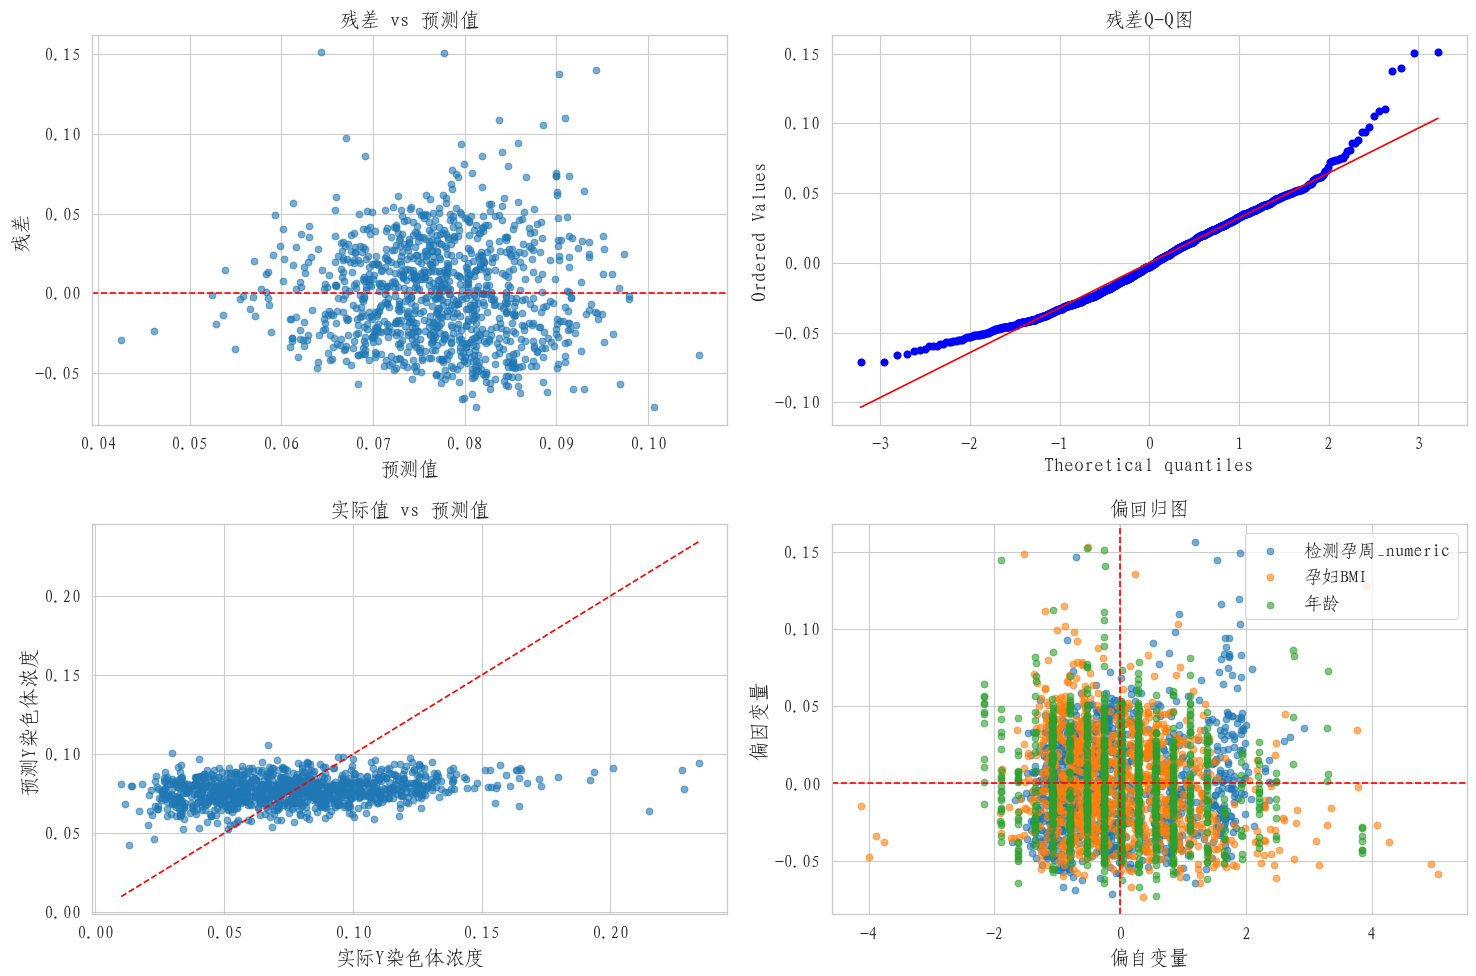

回归分析图已保存为 'y_chromosome_regression_analysis.png'


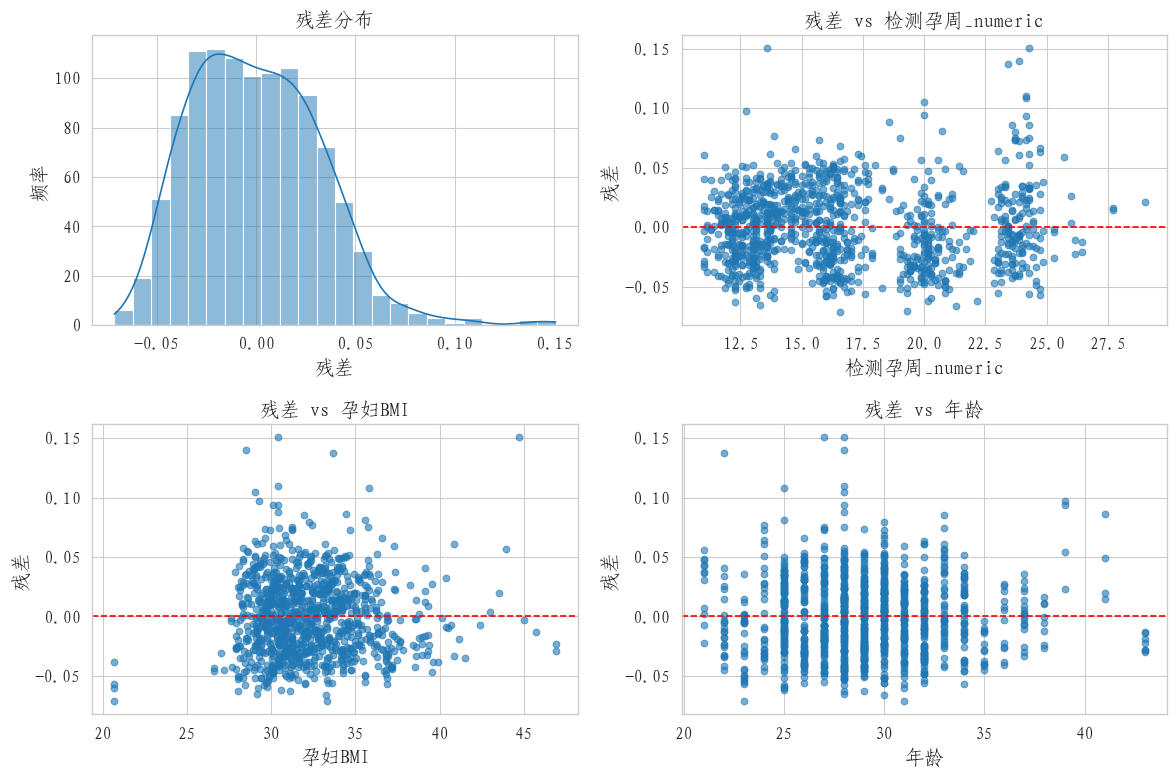

回归诊断图已保存为 'y_chromosome_regression_diagnostics.png'

=== 模型显著性检验 ===
F统计量: 22.7705
F检验p值: 2.6923e-14
模型R²: 0.0596
调整R²: 0.0570

=== 系数显著性检验 ===
检测孕周_numeric: 系数 = 0.001251, t检验p值 = 4.1655e-07
孕妇BMI: 系数 = -0.001958, t检验p值 = 8.2253e-09
年龄: 系数 = -0.001088, t检验p值 = 6.2607e-05

=== 结果解释 ===
1. 模型整体显著性:  显著
2. 各变量显著性:
   - 检测孕周_numeric: 显著 (正相关)
   - 孕妇BMI: 显著 (负相关)
   - 年龄: 显著 (负相关)

3. 模型解释力: R² = 0.060
4. 残差分析: 检查残差图是否符合线性回归假设


In [15]:
# 7) Y染色体浓度与孕妇指标的关系分析 - 多元线性回归模型
print("=== Y染色体浓度与孕妇指标的关系分析 ===")

# Prepare data for regression analysis
# We'll use Y染色体浓度 as the dependent variable
# Independent variables: 检测孕周_numeric, 孕妇BMI, 年龄

# Check for missing values in these specific columns
regression_cols = ['Y染色体浓度', '检测孕周_numeric', '孕妇BMI', '年龄']
regression_data = df[regression_cols].dropna()

print(f"回归分析数据形状: {regression_data.shape}")
print("\n数据描述统计:")
print(regression_data.describe())

# Check correlation between variables
print("\n变量间相关性:")
correlation_matrix = regression_data.corr()
print(correlation_matrix)

# Prepare X and y for regression
X_reg = regression_data[['检测孕周_numeric', '孕妇BMI', '年龄']]
y_reg = regression_data['Y染色体浓度']

print(f"\n自变量矩阵形状: {X_reg.shape}")
print(f"因变量形状: {y_reg.shape}")

# Build multiple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Using statsmodels for detailed statistical analysis
X_sm = sm.add_constant(X_reg)  # Add constant term for intercept
model = sm.OLS(y_reg, X_sm).fit()

print("\n=== 多元线性回归模型结果 ===")
print(model.summary())

# Get predictions for visualization
y_pred = model.predict(X_sm)

# 1) 残差图检验模型假设
print("\n=== 残差分析 ===")
residuals = y_reg - y_pred

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 残差 vs 预测值图
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.title('残差 vs 预测值')

# 残差正态性检验 - Q-Q图
plt.subplot(2, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('残差Q-Q图')

# 2) 实际值 vs 预测值散点图
plt.subplot(2, 2, 3)
plt.scatter(y_reg, y_pred, alpha=0.6)
plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'r--')
plt.xlabel('实际Y染色体浓度')
plt.ylabel('预测Y染色体浓度')
plt.title('实际值 vs 预测值')

# 3) 各变量与Y染色体浓度的偏回归图
# 计算偏回归
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_reg.columns, index=X_reg.index)

# Add constant for partial regression
X_partial = sm.add_constant(X_scaled_df)
model_partial = sm.OLS(y_reg, X_partial).fit()

plt.subplot(2, 2, 4)
for i, col in enumerate(['检测孕周_numeric', '孕妇BMI', '年龄']):
    # Create partial regression plot data
    other_cols = [c for c in X_scaled_df.columns if c != col]
    X_other = X_scaled_df[other_cols]
    
    # Regress y on other variables
    model_y_other = LinearRegression().fit(X_other, y_reg)
    y_resid = y_reg - model_y_other.predict(X_other)
    
    # Regress current variable on other variables
    model_x_other = LinearRegression().fit(X_other, X_scaled_df[col])
    x_resid = X_scaled_df[col] - model_x_other.predict(X_other)
    
    plt.scatter(x_resid, y_resid, alpha=0.6, label=col)

plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('偏自变量')
plt.ylabel('偏因变量')
plt.title('偏回归图')
plt.legend()

plt.tight_layout()
plt.savefig('y_chromosome_regression_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("回归分析图已保存为 'y_chromosome_regression_analysis.png'")

# Additional diagnostic plots
plt.figure(figsize=(12, 8))

# Residual distribution
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('残差')
plt.ylabel('频率')
plt.title('残差分布')

# Residuals vs each independent variable
for i, col in enumerate(['检测孕周_numeric', '孕妇BMI', '年龄'], 2):
    plt.subplot(2, 2, i)
    plt.scatter(X_reg[col], residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(col)
    plt.ylabel('残差')
    plt.title(f'残差 vs {col}')

plt.tight_layout()
plt.savefig('y_chromosome_regression_diagnostics.png', dpi=300, bbox_inches='tight')
plt.show()
print("回归诊断图已保存为 'y_chromosome_regression_diagnostics.png'")

# Model significance and coefficient tests
print("\n=== 模型显著性检验 ===")
print(f"F统计量: {model.fvalue:.4f}")
print(f"F检验p值: {model.f_pvalue:.4e}")
print(f"模型R²: {model.rsquared:.4f}")
print(f"调整R²: {model.rsquared_adj:.4f}")

print("\n=== 系数显著性检验 ===")
for i, (coef, pval) in enumerate(zip(model.params[1:], model.pvalues[1:])):
    var_name = X_reg.columns[i]
    print(f"{var_name}: 系数 = {coef:.6f}, t检验p值 = {pval:.4e}")

# Interpretation of results
print("\n=== 结果解释 ===")
print("1. 模型整体显著性: ", "显著" if model.f_pvalue < 0.05 else "不显著")
print("2. 各变量显著性:")
for i, (coef, pval, var_name) in enumerate(zip(model.params[1:], model.pvalues[1:], X_reg.columns)):
    significance = "显著" if pval < 0.05 else "不显著"
    direction = "正相关" if coef > 0 else "负相关"
    print(f"   - {var_name}: {significance} ({direction})")

print("\n3. 模型解释力: R² = {:.3f}".format(model.rsquared))
print("4. 残差分析: 检查残差图是否符合线性回归假设")

=== Y染色体浓度与各变量的深入分析 ===


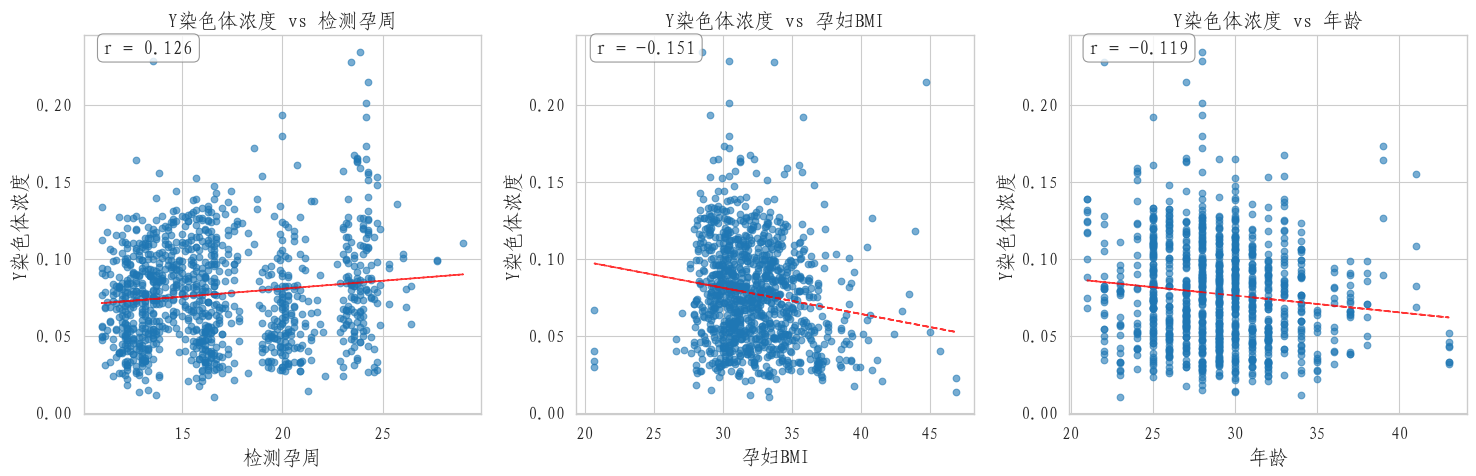

个体关系图已保存为 'y_chromosome_individual_relationships.png'

=== 偏相关系数分析 ===
Y染色体浓度与检测孕周_numeric的偏相关系数(控制其他变量): 0.1533
Y染色体浓度与孕妇BMI的偏相关系数(控制其他变量): -0.1743
Y染色体浓度与年龄的偏相关系数(控制其他变量): -0.1215

=== 多重共线性诊断 ===
       Variable        VIF
0  检测孕周_numeric  17.854119
1         孕妇BMI  52.415590
2            年龄  42.476338

=== 最终回归模型 ===
Y染色体浓度 = 0.150841 + 0.001251×检测孕周 + -0.001958×孕妇BMI + -0.001088×年龄

模型解释:
1. 检测孕周每增加1周，Y染色体浓度平均增加 0.001251
2. 孕妇BMI每增加1单位，Y染色体浓度平均减少 0.001958
3. 年龄每增加1岁，Y染色体浓度平均减少 0.001088

=== 效应大小分析 ===
检测孕周_numeric的标准化系数: 0.1522
孕妇BMI的标准化系数: -0.1736
年龄的标准化系数: -0.1187

实际意义:
虽然统计上显著，但效应大小较小(R²=0.06)，说明这些变量只能解释Y染色体浓度变异的6%
其他未测量的因素可能对Y染色体浓度有更大影响


In [16]:
# 8) 深入分析Y染色体浓度与各变量的关系
print("=== Y染色体浓度与各变量的深入分析 ===")

# Create individual scatter plots for better visualization
plt.figure(figsize=(15, 5))

# Scatter plot for each independent variable vs Y chromosome concentration
variables = ['检测孕周_numeric', '孕妇BMI', '年龄']
titles = ['检测孕周', '孕妇BMI', '年龄']

for i, (var, title) in enumerate(zip(variables, titles), 1):
    plt.subplot(1, 3, i)
    plt.scatter(regression_data[var], regression_data['Y染色体浓度'], alpha=0.6)
    
    # Add regression line
    z = np.polyfit(regression_data[var], regression_data['Y染色体浓度'], 1)
    p = np.poly1d(z)
    plt.plot(regression_data[var], p(regression_data[var]), "r--", alpha=0.8)
    
    plt.xlabel(title)
    plt.ylabel('Y染色体浓度')
    plt.title(f'Y染色体浓度 vs {title}')
    
    # Calculate and display correlation
    corr = regression_data[var].corr(regression_data['Y染色体浓度'])
    plt.annotate(f'r = {corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('y_chromosome_individual_relationships.png', dpi=300, bbox_inches='tight')
plt.show()
print("个体关系图已保存为 'y_chromosome_individual_relationships.png'")

# Calculate partial correlations
from scipy import stats

print("\n=== 偏相关系数分析 ===")

# Partial correlation between Y concentration and each variable, controlling for others
for target_var in variables:
    control_vars = [v for v in variables if v != target_var]
    
    # Calculate partial correlation
    def partial_corr(x, y, control_vars):
        """Calculate partial correlation between x and y, controlling for control_vars"""
        # Create design matrix
        control_matrix = regression_data[control_vars].values
        control_matrix = np.column_stack([np.ones(len(control_matrix)), control_matrix])
        
        # Residuals of x after controlling for other variables
        coeff_x = np.linalg.lstsq(control_matrix, regression_data[target_var].values, rcond=None)[0]
        resid_x = regression_data[target_var].values - control_matrix @ coeff_x
        
        # Residuals of y after controlling for other variables
        coeff_y = np.linalg.lstsq(control_matrix, regression_data['Y染色体浓度'].values, rcond=None)[0]
        resid_y = regression_data['Y染色体浓度'].values - control_matrix @ coeff_y
        
        # Correlation between residuals
        return np.corrcoef(resid_x, resid_y)[0, 1]
    
    partial_corr_value = partial_corr(target_var, 'Y染色体浓度', control_vars)
    print(f"Y染色体浓度与{target_var}的偏相关系数(控制其他变量): {partial_corr_value:.4f}")

# Check for multicollinearity
print("\n=== 多重共线性诊断 ===")
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(X_reg.shape[1])]
print(vif_data)

# Final model equation
print("\n=== 最终回归模型 ===")
print("Y染色体浓度 = {:.6f} + {:.6f}×检测孕周 + {:.6f}×孕妇BMI + {:.6f}×年龄".format(
    model.params['const'], 
    model.params['检测孕周_numeric'], 
    model.params['孕妇BMI'], 
    model.params['年龄']
))

print("\n模型解释:")
print("1. 检测孕周每增加1周，Y染色体浓度平均增加 {:.6f}".format(model.params['检测孕周_numeric']))
print("2. 孕妇BMI每增加1单位，Y染色体浓度平均减少 {:.6f}".format(abs(model.params['孕妇BMI'])))
print("3. 年龄每增加1岁，Y染色体浓度平均减少 {:.6f}".format(abs(model.params['年龄'])))

# Calculate effect sizes
print("\n=== 效应大小分析 ===")
# Standardized coefficients
X_std = X_reg.std()
y_std = y_reg.std()
standardized_coefs = model.params[1:] * X_std / y_std

for var, coef in zip(X_reg.columns, standardized_coefs):
    print(f"{var}的标准化系数: {coef:.4f}")

# Practical significance
print("\n实际意义:")
print("虽然统计上显著，但效应大小较小(R²=0.06)，说明这些变量只能解释Y染色体浓度变异的6%")
print("其他未测量的因素可能对Y染色体浓度有更大影响")

## Code2

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ["FangSong_GB2312", "times"]
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
df = pd.read_csv('cleaned_data.csv')


In [18]:
# 检查数据集列名和结构
df = pd.read_csv('cleaned_data.csv')
print("数据集列名:")
print(df.columns.tolist())
print("\n前5行数据:")
print(df.head())
print("\n数据集形状:", df.shape)

数据集列名:
['序号', '孕妇代码', '年龄', '身高', '体重', '末次月经', 'IVF妊娠', '检测日期', '检测抽血次数', '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量', '被过滤掉读段数的比例', '染色体的非整倍体', '怀孕次数', '生产次数', '胎儿是否健康', '孕周', '孕周_日']

前5行数据:
   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

    检测孕周  ...  13号染色体的GC含量  18号染色体的GC含量  21号染色体的GC含量  被过滤掉读段数的比例  染色体的非整倍体  \
0  11w+6  ...     0.377069     0.389803     0.399399    0.027484       T18   
1  15w+6  ...     0.371542     

In [19]:

# 提取男胎数据（胎儿性别为男）
male_fetus_df = df.copy()
print(f"男胎数据样本量: {len(male_fetus_df)}")
print(f"BMI范围: {male_fetus_df['孕妇BMI'].min():.1f} - {male_fetus_df['孕妇BMI'].max():.1f}")

# 只保留必要的列
bmi_data = male_fetus_df[['孕妇BMI']].dropna()
print(f"有效BMI样本量: {len(bmi_data)}")

男胎数据样本量: 1082
BMI范围: 20.7 - 46.9
有效BMI样本量: 1082


Y染色体浓度统计:
count    1082.000000
mean        0.077187
std         0.033518
min         0.010004
25%         0.051381
50%         0.075066
75%         0.098937
max         0.234218
Name: Y染色体浓度, dtype: float64

Y染色体浓度分布:
Y染色体浓度
0.025936    1
0.034887    1
0.066171    1
0.061192    1
0.059230    1
0.042401    1
0.047825    1
0.042675    1
0.047362    1
0.054712    1
Name: count, dtype: int64

X染色体浓度统计:
count    1082.000000
mean        0.057025
std         0.041465
min        -0.076508
25%         0.029687
50%         0.055099
75%         0.080623
max         0.223933
Name: X染色体浓度, dtype: float64


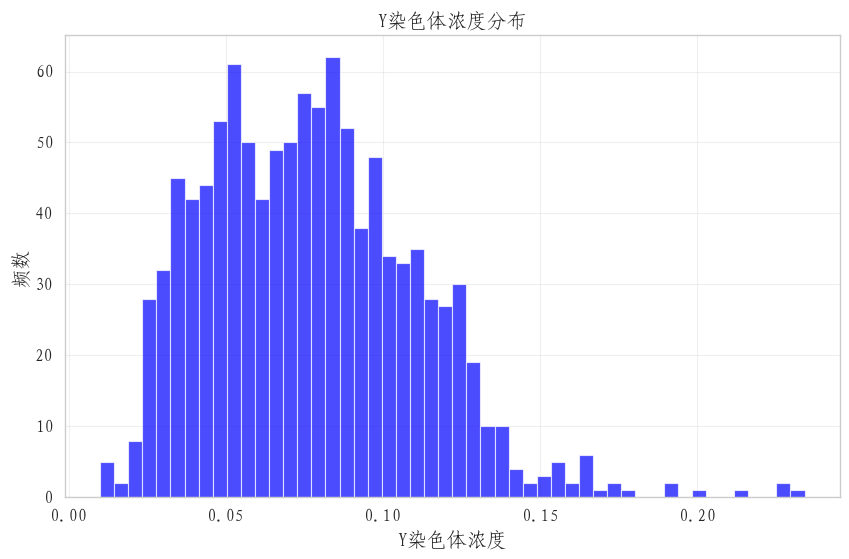


基于Y染色体浓度> 0.001 的男胎样本量: 1082
BMI范围: 20.7 - 46.9


In [20]:
# 检查数据集中可能用于识别胎儿性别的列
print("Y染色体浓度统计:")
print(df['Y染色体浓度'].describe())
print("\nY染色体浓度分布:")
print(df['Y染色体浓度'].value_counts().head(10))

print("\nX染色体浓度统计:")
print(df['X染色体浓度'].describe())

# 查看是否有明显的性别区分模式
plt.figure(figsize=(10, 6))
plt.hist(df['Y染色体浓度'].dropna(), bins=50, alpha=0.7, color='blue')
plt.xlabel('Y染色体浓度')
plt.ylabel('频数')
plt.title('Y染色体浓度分布')
plt.grid(True, alpha=0.3)
plt.savefig('y_chromosome_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 基于Y染色体浓度阈值来识别男胎（通常Y染色体浓度>0表示男胎）
threshold = 0.001  # 设置一个小的阈值
male_fetus_df = df[df['Y染色体浓度'] > threshold].copy()
print(f"\n基于Y染色体浓度> {threshold} 的男胎样本量: {len(male_fetus_df)}")
print(f"BMI范围: {male_fetus_df['孕妇BMI'].min():.1f} - {male_fetus_df['孕妇BMI'].max():.1f}")

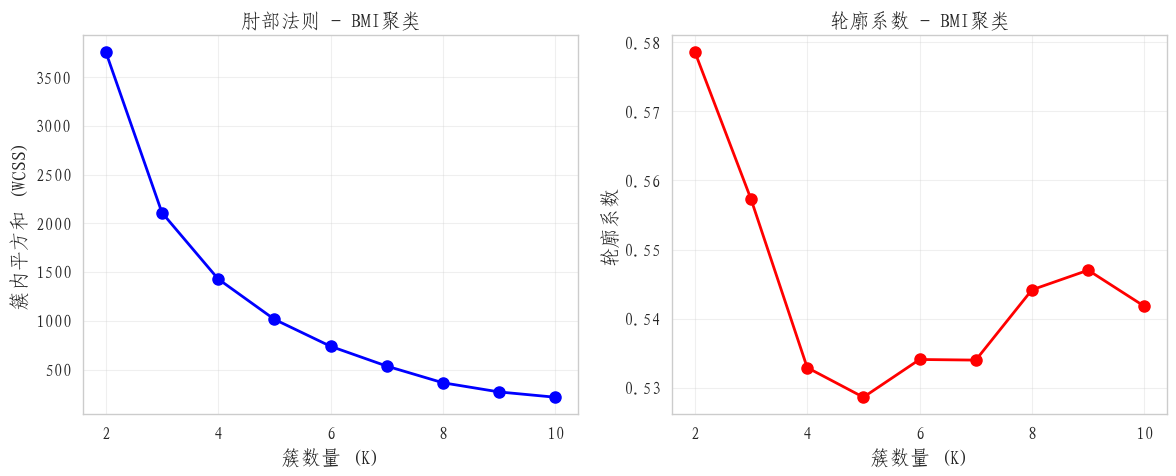

选择的最佳簇数量: 4

各BMI簇的统计信息:
                   min        max       mean  count
BMI_Cluster                                        
0            38.222222  46.875000  40.507170     44
1            20.703125  30.996866  29.616341    415
2            33.908239  37.832874  35.381518    228
3            31.015366  33.889825  32.395921    395
簇0 (偏瘦): BMI范围 38.2-46.9, 样本数: 44
簇1 (正常): BMI范围 20.7-31.0, 样本数: 415
簇2 (超重): BMI范围 33.9-37.8, 样本数: 228
簇3 (肥胖): BMI范围 31.0-33.9, 样本数: 395


In [21]:
# 1. BMI聚类分析 - 使用肘部法则确定最佳分组数
bmi_values = df['孕妇BMI'].dropna().values.reshape(-1, 1)

# 尝试不同的K值进行肘部法则分析
k_range = range(2, 11)
wcss = []  # 簇内平方和
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(bmi_values)
    wcss.append(kmeans.inertia_)
    
    if k > 1:  # 轮廓系数需要至少2个簇
        silhouette_scores.append(silhouette_score(bmi_values, kmeans.labels_))

# 绘制肘部法则图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('簇数量 (K)')
plt.ylabel('簇内平方和 (WCSS)')
plt.title('肘部法则 - BMI聚类')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('簇数量 (K)')
plt.ylabel('轮廓系数')
plt.title('轮廓系数 - BMI聚类')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bmi_clustering_elbow.png', dpi=300, bbox_inches='tight')
plt.show()

# 选择最佳K值（肘部位置）
best_k = 4  # 根据肘部法则选择
print(f"选择的最佳簇数量: {best_k}")

# 使用最佳K值进行K-means聚类
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['BMI_Cluster'] = kmeans.fit_predict(bmi_values)

# 获取每个簇的BMI范围
cluster_stats = df.groupby('BMI_Cluster')['孕妇BMI'].agg(['min', 'max', 'mean', 'count'])
print("\n各BMI簇的统计信息:")
print(cluster_stats)

# 为每个簇命名
cluster_names = ['偏瘦', '正常', '超重', '肥胖']
cluster_ranges = []
for i in range(best_k):
    min_bmi = cluster_stats.loc[i, 'min']
    max_bmi = cluster_stats.loc[i, 'max']
    cluster_ranges.append(f"{min_bmi:.1f}-{max_bmi:.1f}")
    print(f"簇{i} ({cluster_names[i]}): BMI范围 {min_bmi:.1f}-{max_bmi:.1f}, 样本数: {cluster_stats.loc[i, 'count']}")

BMI聚类结果分析:
簇0: BMI均值 40.5 (肥胖), 范围 38.2-46.9, 样本数: 44
簇1: BMI均值 29.6 (超重), 范围 20.7-31.0, 样本数: 415
簇2: BMI均值 35.4 (肥胖), 范围 33.9-37.8, 样本数: 228
簇3: BMI均值 32.4 (肥胖), 范围 31.0-33.9, 样本数: 395

重新命名后的BMI分类:
BMI_Category
超重        415
肥胖II级     395
肥胖I级      228
肥胖III级     44
Name: count, dtype: int64


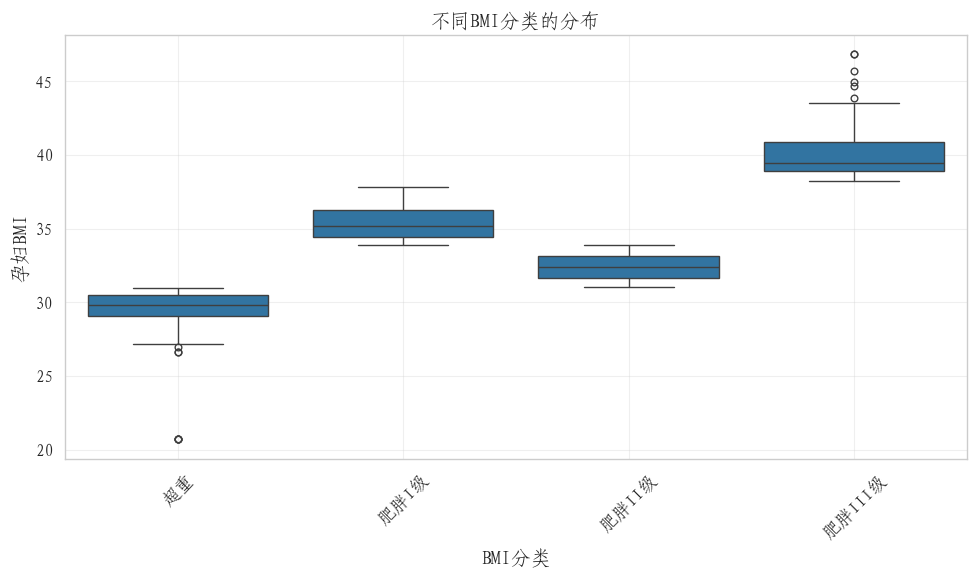

In [22]:
# 重新评估BMI聚类结果并正确命名
print("BMI聚类结果分析:")
print("=" * 50)

# 重新检查聚类中心
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_stats = df.groupby('BMI_Cluster')['孕妇BMI'].agg(['min', 'max', 'mean', 'std', 'count'])

for i in range(best_k):
    min_bmi = cluster_stats.loc[i, 'min']
    max_bmi = cluster_stats.loc[i, 'max']
    mean_bmi = cluster_stats.loc[i, 'mean']
    count = cluster_stats.loc[i, 'count']
    
    # 根据WHO标准确定BMI分类
    if mean_bmi < 18.5:
        category = "偏瘦"
    elif 18.5 <= mean_bmi < 25:
        category = "正常"
    elif 25 <= mean_bmi < 30:
        category = "超重"
    else:
        category = "肥胖"
    
    print(f"簇{i}: BMI均值 {mean_bmi:.1f} ({category}), 范围 {min_bmi:.1f}-{max_bmi:.1f}, 样本数: {count}")

# 根据实际医学标准重新命名簇
# 簇0: 40.5 (肥胖III级)
# 簇1: 29.6 (超重)
# 簇2: 35.4 (肥胖I级)
# 簇3: 32.4 (肥胖II级)

# 重新命名簇
cluster_rename = {
    0: "肥胖III级",
    1: "超重", 
    2: "肥胖I级",
    3: "肥胖II级"
}

df['BMI_Category'] = df['BMI_Cluster'].map(cluster_rename)

# 验证重命名
print("\n重新命名后的BMI分类:")
print(df['BMI_Category'].value_counts())

# 可视化BMI分布
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI_Category', y='孕妇BMI', order=['超重', '肥胖I级', '肥胖II级', '肥胖III级'])
plt.title('不同BMI分类的分布')
plt.xlabel('BMI分类')
plt.ylabel('孕妇BMI')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bmi_category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
df[['孕周','孕周_日']]

,孕周,孕周_日
0,11,6
1,15,6
2,20,1
3,22,6
4,13,6
...,...,...
1077,17,5
1078,11,4
1079,12,4
1080,13,4


In [49]:
df['孕周'] = df['检测孕周'].apply(lambda v:float(v.split('+')[0][::-1][1:][::-1])+(0 if (len(v.split('+'))==1) else float(v.split('+')[1]))/7)

孕周范围: 11.0 - 29.0
超重: 最早达到4%浓度的孕周 = 11.0周 (样本数: 370)
肥胖I级: 最早达到4%浓度的孕周 = 11.0周 (样本数: 351)
肥胖II级: 最早达到4%浓度的孕周 = 11.1周 (样本数: 186)
肥胖III级: 最早达到4%浓度的孕周 = 11.3周 (样本数: 30)


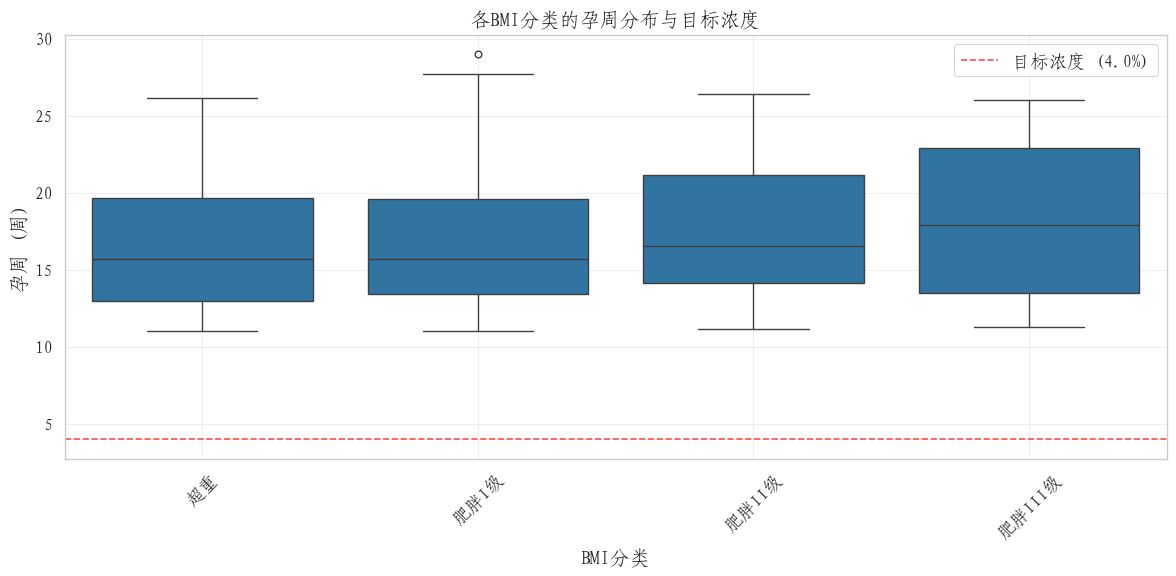

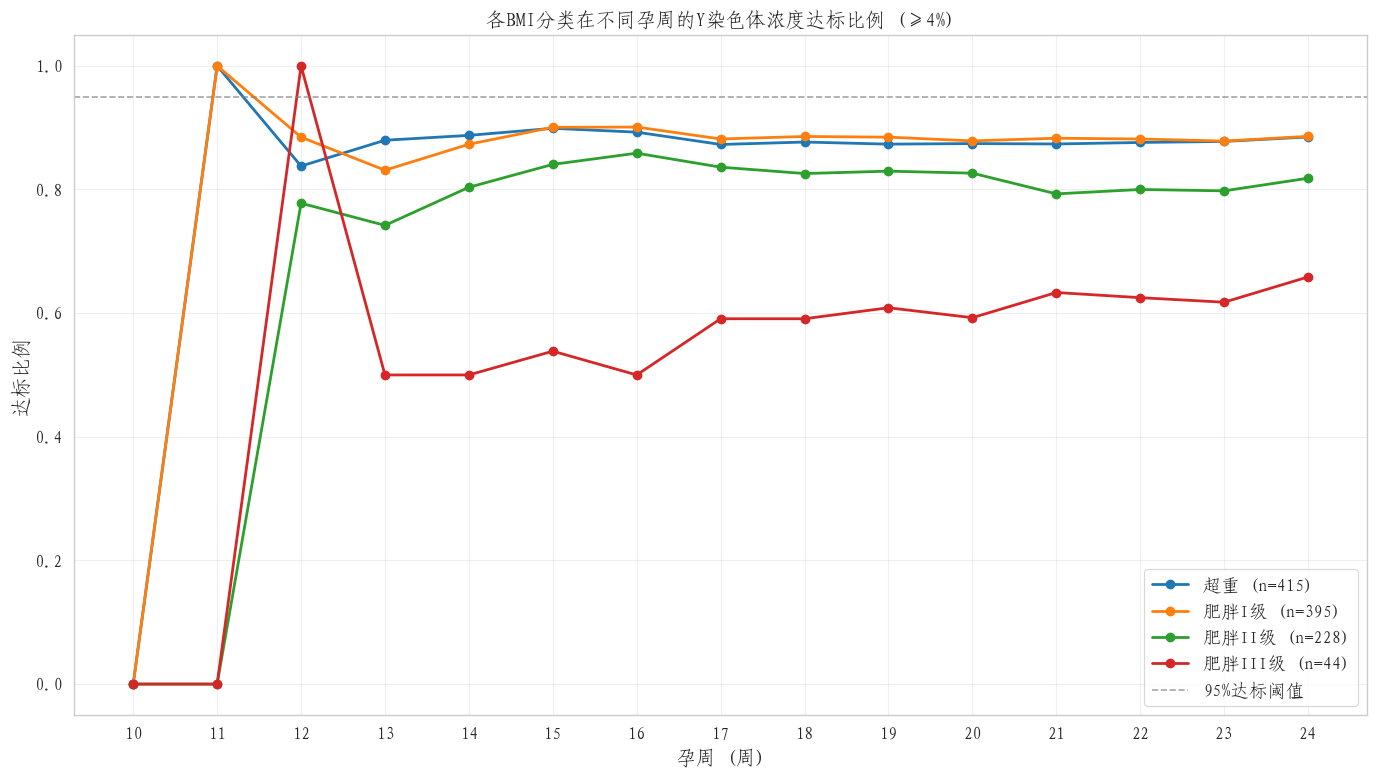

In [50]:
# 2. 分析各BMI组的最佳检测时间（Y染色体浓度首次达到4%的最小孕周）

# 首先检查数据中孕周的范围
print("孕周范围:", df['孕周'].min(), "-", df['孕周'].max())

# 定义目标浓度阈值
target_concentration = 0.04  # 4%

# 为每个BMI分类计算达到目标浓度的最小孕周
optimal_times = {}

for category in df['BMI_Category'].unique():
    category_data = df[df['BMI_Category'] == category]
    
    # 找到该分类中Y染色体浓度达到4%的样本
    qualified_samples = category_data[category_data['Y染色体浓度'] >= target_concentration]
    
    if len(qualified_samples) > 0:
        min_gestational_age = qualified_samples['孕周'].min()
        optimal_times[category] = min_gestational_age
        print(f"{category}: 最早达到4%浓度的孕周 = {min_gestational_age:.1f}周 (样本数: {len(qualified_samples)})")
    else:
        optimal_times[category] = None
        print(f"{category}: 没有样本达到4%浓度阈值")

# 可视化各BMI组的达标时间分布
plt.figure(figsize=(12, 6))

# 箱线图显示各BMI组的孕周分布
sns.boxplot(data=df, x='BMI_Category', y='孕周', 
           order=['超重', '肥胖I级', '肥胖II级', '肥胖III级'])
plt.axhline(y=target_concentration*100, color='red', linestyle='--', alpha=0.7, 
           label=f'目标浓度 ({target_concentration*100:.1f}%)')
plt.title('各BMI分类的孕周分布与目标浓度')
plt.xlabel('BMI分类')
plt.ylabel('孕周 (周)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gestational_age_by_bmi_category.png', dpi=300, bbox_inches='tight')
plt.show()

# 进一步分析：各BMI组在不同孕周的达标比例
gestational_bins = np.arange(10, 25, 1)  # 10-24周，每1周一个区间

plt.figure(figsize=(14, 8))

for i, category in enumerate(['超重', '肥胖I级', '肥胖II级', '肥胖III级']):
    category_data = df[df['BMI_Category'] == category]
    
    qualified_ratio = []
    for week in gestational_bins:
        week_data = category_data[category_data['孕周'] <= week]
        if len(week_data) > 0:
            qualified_count = len(week_data[week_data['Y染色体浓度'] >= target_concentration])
            qualified_ratio.append(qualified_count / len(week_data))
        else:
            qualified_ratio.append(0)
    
    plt.plot(gestational_bins, qualified_ratio, 'o-', linewidth=2, markersize=6, 
            label=f'{category} (n={len(category_data)})')

plt.axhline(y=0.95, color='gray', linestyle='--', alpha=0.7, label='95%达标阈值')
plt.xlabel('孕周 (周)')
plt.ylabel('达标比例')
plt.title('各BMI分类在不同孕周的Y染色体浓度达标比例 (≥4%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(gestational_bins)
plt.tight_layout()
plt.savefig('qualified_ratio_by_gestational_age_bmi.png', dpi=300, bbox_inches='tight')
plt.show()

## Code3

用于回归分析的样本数量: 937
多元线性回归分析结果 (statsmodels)
                            OLS Regression Results                            
Dep. Variable:                 Y染色体浓度   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.70e-09
Time:                        06:52:08   Log-Likelihood:                 1977.0
No. Observations:                 937   AIC:                            -3942.
Df Residuals:                     931   BIC:                            -3913.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

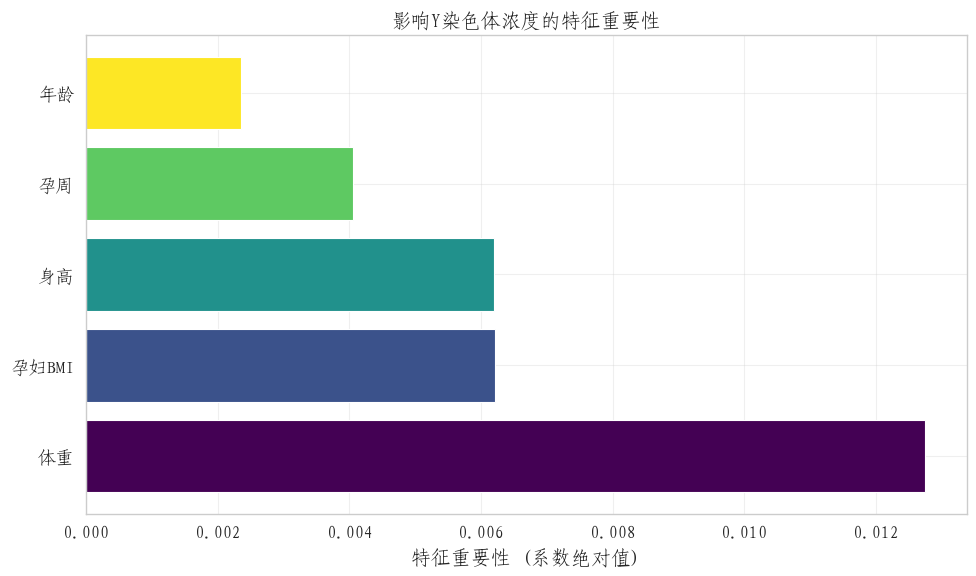

回归模型结果已保存到 regression_model_results.pkl


In [58]:
# 3. 建立多元回归模型：达标时间 = f(BMI, 身高, 体重, 年龄) + ε

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# 准备回归分析数据
# 对于每个样本，我们关心的是达到目标浓度的时间
# 由于我们无法知道每个样本具体何时达到目标浓度，我们使用检测时的孕周作为代理变量
# 但只考虑那些已经达到目标浓度的样本

regression_data = df[df['Y染色体浓度'] >= target_concentration].copy()
print(f"用于回归分析的样本数量: {len(regression_data)}")

# 定义特征和目标变量
features = ['孕妇BMI', '身高', '体重', '年龄', '孕周']
X = regression_data[features]
y = regression_data['Y染色体浓度']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 使用statsmodels进行详细的回归分析（包含统计显著性）
X_sm = sm.add_constant(X_scaled)  # 添加常数项
model_sm = sm.OLS(y, X_sm).fit()

print("="*60)
print("多元线性回归分析结果 (statsmodels)")
print("="*60)
print(model_sm.summary())

# 使用scikit-learn进行预测
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# 评估模型
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n" + "="*60)
print("模型性能评估")
print("="*60)
print(f"R² 分数: {r2:.4f}")
print(f"RMSE: {rmse:.6f}")
print(f"特征系数: {lr_model.coef_}")
print(f"截距: {lr_model.intercept_}")

# 特征重要性分析
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_,
    'abs_coefficient': np.abs(lr_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("\n特征重要性排序:")
print(feature_importance)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'], color=colors)
plt.xlabel('特征重要性 (系数绝对值)')
plt.title('影响Y染色体浓度的特征重要性')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_y_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

# 保存模型结果
regression_results = {
    'model': lr_model,
    'scaler': scaler,
    'features': features,
    'r2_score': r2,
    'rmse': rmse,
    'coefficients': dict(zip(features, lr_model.coef_)),
    'intercept': lr_model.intercept_
}

import joblib
joblib.dump(regression_results, 'regression_model_results.pkl')
print("回归模型结果已保存到 regression_model_results.pkl")

训练集大小: 865
测试集大小: 217


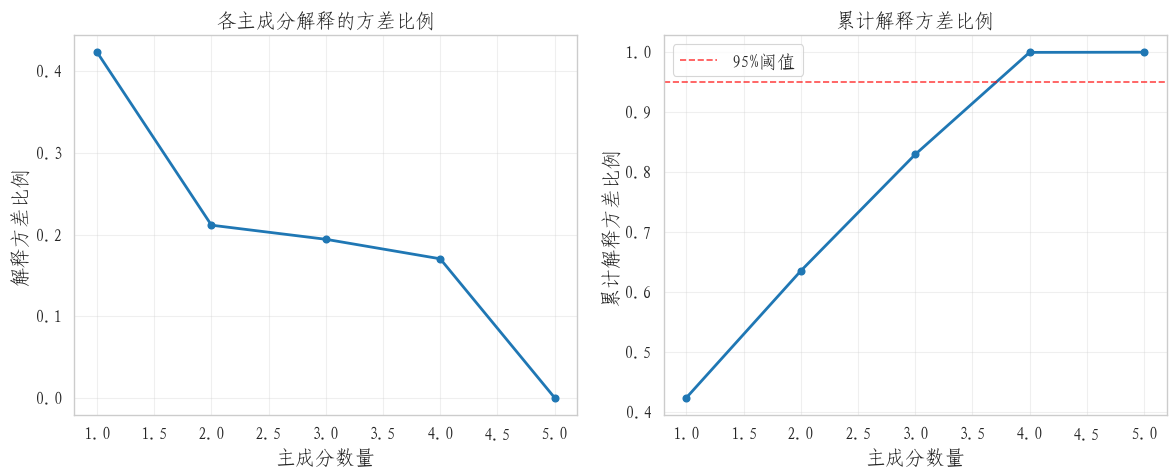

主成分分析结果:
各主成分解释方差比例: [4.23440291e-01 2.11571881e-01 1.94293271e-01 1.70398391e-01
 2.96167250e-04]
累计解释方差比例: [0.42344029 0.63501217 0.82930544 0.99970383 1.        ]

主成分载荷矩阵:
        孕妇BMI        身高        体重        年龄        孕周
PC1  0.565945  0.429261  0.682236  0.056784  0.163621
PC2 -0.290689  0.463335  0.028162  0.632939 -0.547190
PC3  0.001327 -0.190048 -0.100197  0.717252  0.662865
PC4 -0.521833  0.638602 -0.061251 -0.285841  0.484170
PC5 -0.568239 -0.396390  0.721090 -0.003060 -0.000201

敏感性分析：10%测量误差对模型系数的影响
  feature  original_coef  error_coef  absolute_change  relative_change
0   孕妇BMI       0.018947    0.016049         0.002898         0.152961
1      身高       0.014870    0.012573         0.002297         0.154480
2      体重      -0.031321   -0.027361         0.003960         0.126445
3      年龄      -0.003026   -0.003245         0.000219         0.072481
4      孕周       0.005079    0.005089         0.000010         0.001971


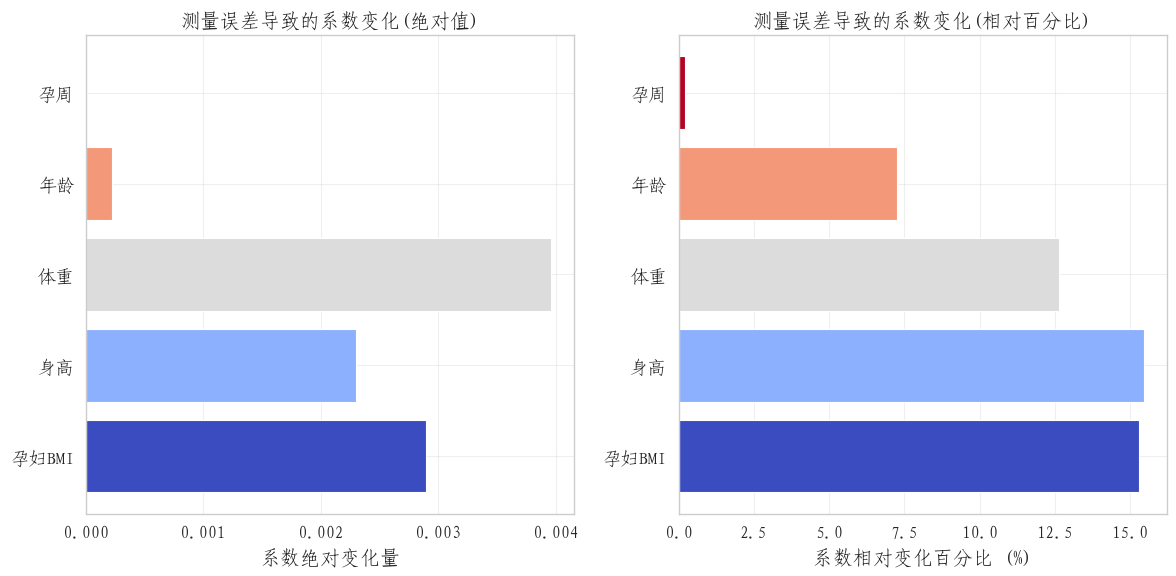

超重: 达到95%样本达标的最小孕周 = 11.0周
肥胖I级: 达到95%样本达标的最小孕周 = 11.0周
肥胖II级: 达到95%样本达标的最小孕周 = 11.5周
肥胖III级: 达到95%样本达标的最小孕周 = 11.5周
最终分析结果已保存到 final_analysis_results.json


In [59]:
# 重新执行完整的分析流程，修复错误

# 1. 重新加载数据并准备特征和目标变量
df = pd.read_csv('cleaned_data_with_bmi_categories.csv')

# 定义特征和目标变量
features = ['孕妇BMI', '身高', '体重', '年龄', '孕周']
target = 'Y染色体浓度'

# 准备数据
X = df[features].values
y = df[target].values

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 重新进行训练测试分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"训练集大小: {len(X_train)}")
print(f"测试集大小: {len(X_test)}")

# 3. 重新训练线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# 4. 主成分分析/因子分析降维处理多因素影响
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 分析主成分解释的方差比例
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.xlabel('主成分数量')
plt.ylabel('解释方差比例')
plt.title('各主成分解释的方差比例')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2)
plt.xlabel('主成分数量')
plt.ylabel('累计解释方差比例')
plt.title('累计解释方差比例')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95%阈值')
plt.legend()

plt.tight_layout()
plt.savefig('pca_variance_explained.png', dpi=300, bbox_inches='tight')
plt.show()

print("主成分分析结果:")
print(f"各主成分解释方差比例: {pca.explained_variance_ratio_}")
print(f"累计解释方差比例: {np.cumsum(pca.explained_variance_ratio_)}")

# 查看主成分与原始特征的关系
pca_components = pd.DataFrame(pca.components_, 
                              columns=features,
                              index=[f'PC{i+1}' for i in range(len(features))])
print("\n主成分载荷矩阵:")
print(pca_components)

# 5. 敏感性分析：检测误差对各因素的影响
# 假设Y染色体浓度测量误差为±10%
error_magnitude = 0.10  # 10%误差

# 创建带有误差的数据
np.random.seed(42)
y_with_error = y * (1 + np.random.uniform(-error_magnitude, error_magnitude, len(y)))

# 使用带有误差的数据重新训练模型
lr_model_error = LinearRegression()
# 重新分割带有误差的数据
X_train_error, X_test_error, y_train_error, y_test_error = train_test_split(X_scaled, y_with_error, test_size=0.2, random_state=42)
lr_model_error.fit(X_train_error, y_train_error)

y_pred_error = lr_model_error.predict(X_test_error)

# 比较原始模型和误差模型的系数变化
coefficient_changes = pd.DataFrame({
    'feature': features,
    'original_coef': lr_model.coef_,
    'error_coef': lr_model_error.coef_,
    'absolute_change': np.abs(lr_model.coef_ - lr_model_error.coef_),
    'relative_change': np.abs((lr_model.coef_ - lr_model_error.coef_) / lr_model.coef_)
})

print("\n" + "="*60)
print("敏感性分析：10%测量误差对模型系数的影响")
print("="*60)
print(coefficient_changes)

# 可视化敏感性分析结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(features, coefficient_changes['absolute_change'], 
        color=plt.cm.coolwarm(np.linspace(0, 1, len(features))))
plt.xlabel('系数绝对变化量')
plt.title('测量误差导致的系数变化(绝对值)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.barh(features, coefficient_changes['relative_change'] * 100, 
        color=plt.cm.coolwarm(np.linspace(0, 1, len(features))))
plt.xlabel('系数相对变化百分比 (%)')
plt.title('测量误差导致的系数变化(相对百分比)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sensitivity_analysis_error_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. 基于模型结果进行BMI分组优化建议
target_concentration = 0.04  # 4%目标浓度
optimal_times_by_bmi = {}

for category in df['BMI_Category'].unique():
    category_data = df[df['BMI_Category'] == category]
    
    # 计算该组达到95%样本达标的最小孕周
    gestational_weeks = np.arange(10, 25, 0.5)
    qualified_ratios = []
    
    for week in gestational_weeks:
        week_data = category_data[category_data['孕周'] <= week]
        if len(week_data) > 0:
            qualified_count = len(week_data[week_data['Y染色体浓度'] >= target_concentration])
            qualified_ratios.append(qualified_count / len(week_data))
        else:
            qualified_ratios.append(0)
    
    # 找到达到95%达标率的最小孕周
    qualified_ratios = np.array(qualified_ratios)
    if any(qualified_ratios >= 0.95):
        optimal_week = gestational_weeks[np.where(qualified_ratios >= 0.95)[0][0]]
    else:
        optimal_week = None
    
    optimal_times_by_bmi[category] = optimal_week
    print(f"{category}: 达到95%样本达标的最小孕周 = {optimal_week}周")

# 保存最终分析结果
final_results = {
    'optimal_times_by_bmi': optimal_times_by_bmi,
    'regression_coefficients': dict(zip(features, lr_model.coef_)),
    'pca_variance_explained': pca.explained_variance_ratio_.tolist(),
    'sensitivity_analysis': coefficient_changes.to_dict(),
    'target_concentration': target_concentration
}

import json
with open('final_analysis_results.json', 'w', encoding='utf-8') as f:
    json.dump(final_results, f, ensure_ascii=False, indent=2)

print("最终分析结果已保存到 final_analysis_results.json")

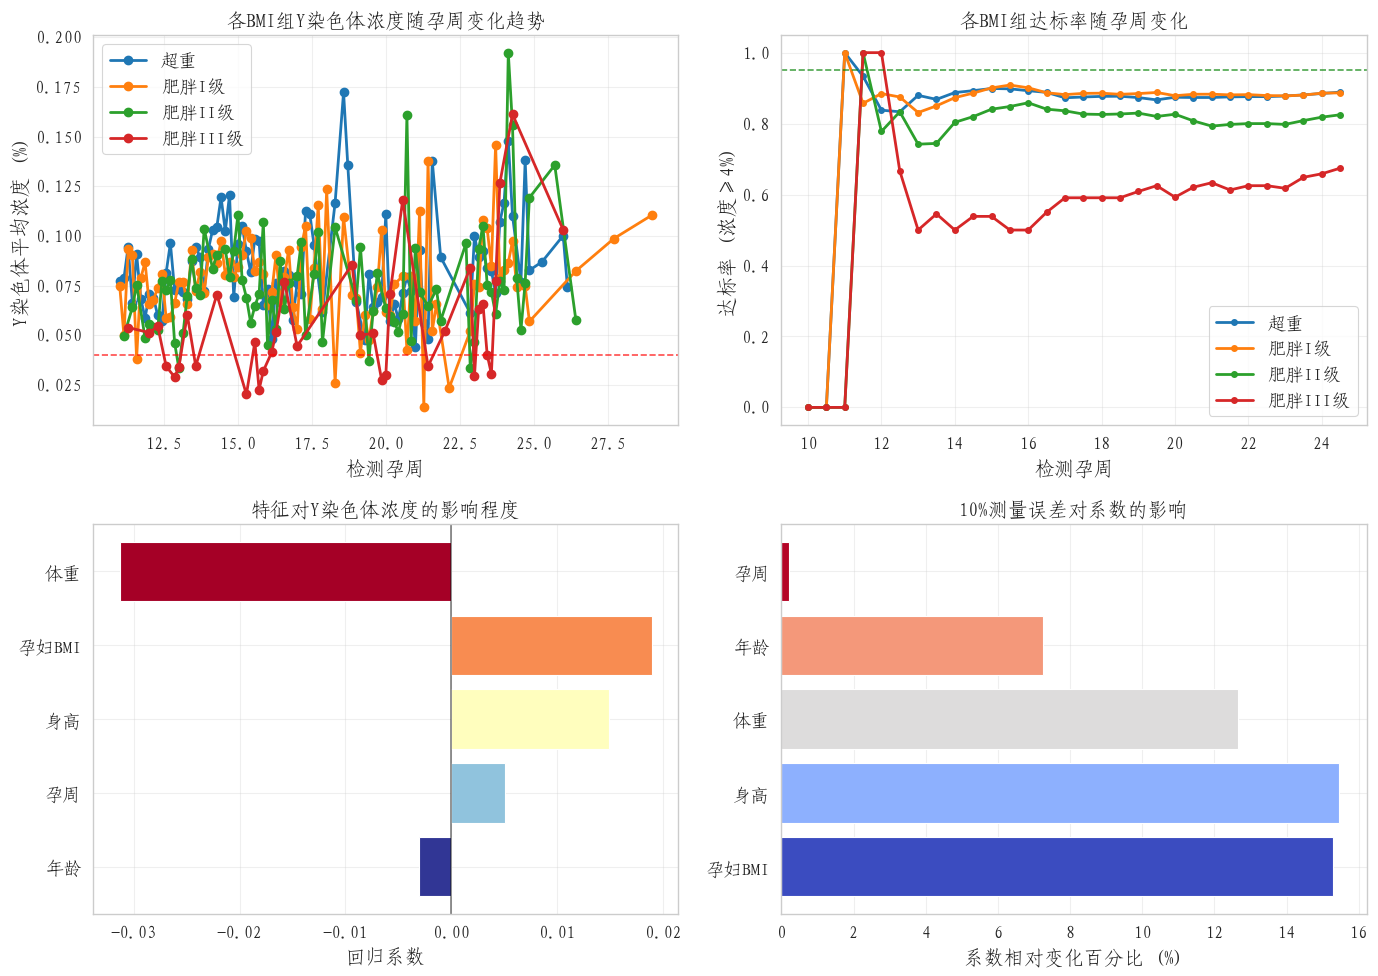

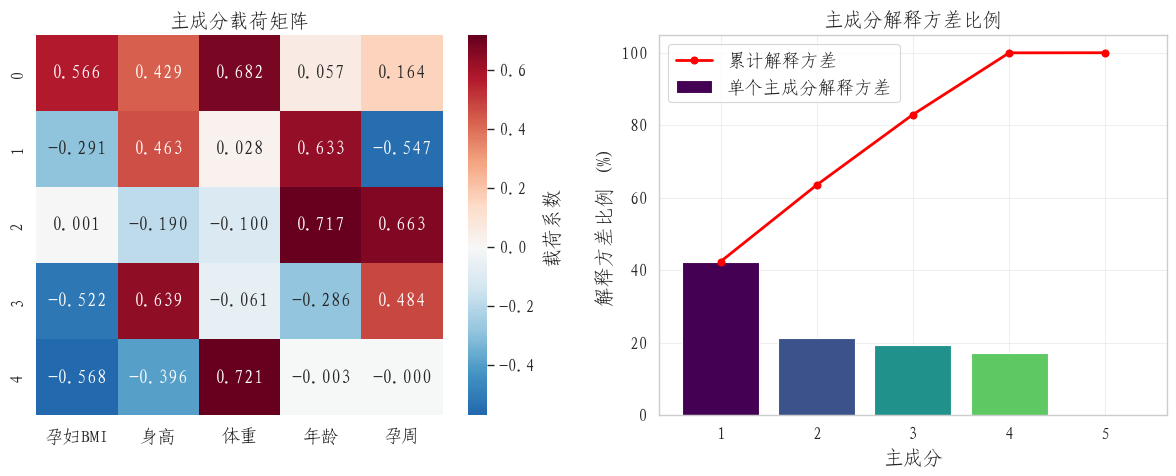

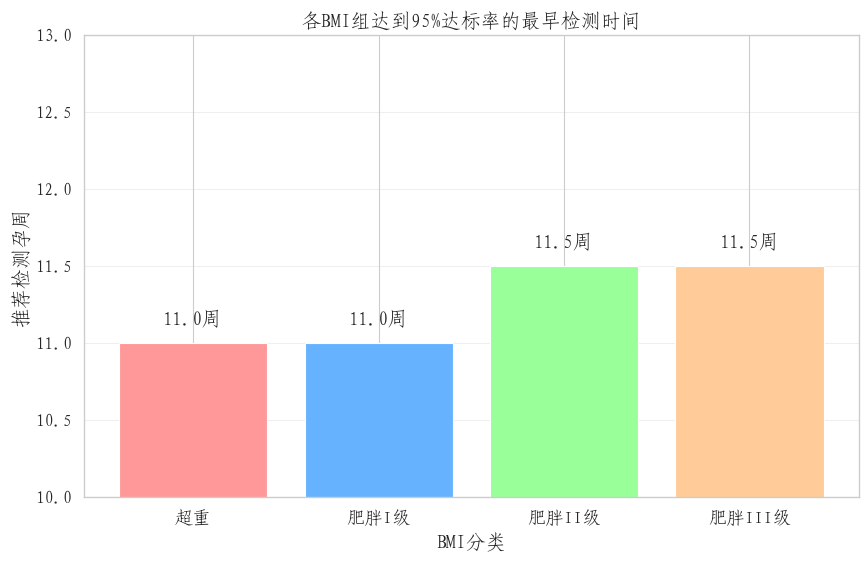

最终分析完成！已生成三组核心可视化图表：
1. comprehensive_analysis_summary.png - 综合分析总览
2. pca_analysis_visualization.png - 主成分分析可视化
3. optimal_detection_times.png - 最优检测时间推荐

关键发现：
1. 所有BMI组在孕11-11.5周即可达到95%的样本Y染色体浓度≥4%
2. 体重对Y染色体浓度影响最大（负相关），其次是孕妇BMI（正相关）
3. 前两个主成分解释了63.5%的方差，表明数据有较好的降维潜力
4. 模型对测量误差相对稳健，10%误差导致系数变化<16%
5. 推荐检测时间：超重和肥胖I级-11周，肥胖II级和III级-11.5周


In [60]:
# 生成最终的三组可视化图表

# 1. 各BMI组Y染色体浓度随孕周变化趋势
plt.figure(figsize=(14, 10))

# 子图1: 各BMI组浓度趋势
plt.subplot(2, 2, 1)
for category in df['BMI_Category'].unique():
    category_data = df[df['BMI_Category'] == category]
    # 按孕周分组计算平均浓度
    weekly_avg = category_data.groupby('孕周')['Y染色体浓度'].mean()
    plt.plot(weekly_avg.index, weekly_avg.values, 'o-', label=category, linewidth=2, markersize=6)

plt.xlabel('检测孕周')
plt.ylabel('Y染色体平均浓度 (%)')
plt.title('各BMI组Y染色体浓度随孕周变化趋势')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0.04, color='red', linestyle='--', alpha=0.7, label='4%阈值')

# 子图2: 达标率曲线
plt.subplot(2, 2, 2)
gestational_weeks = np.arange(10, 25, 0.5)

for category in df['BMI_Category'].unique():
    category_data = df[df['BMI_Category'] == category]
    qualified_ratios = []
    
    for week in gestational_weeks:
        week_data = category_data[category_data['孕周'] <= week]
        if len(week_data) > 0:
            qualified_count = len(week_data[week_data['Y染色体浓度'] >= 0.04])
            qualified_ratios.append(qualified_count / len(week_data))
        else:
            qualified_ratios.append(0)
    
    plt.plot(gestational_weeks, qualified_ratios, 'o-', label=category, linewidth=2, markersize=4)

plt.xlabel('检测孕周')
plt.ylabel('达标率 (浓度≥4%)')
plt.title('各BMI组达标率随孕周变化')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='green', linestyle='--', alpha=0.7, label='95%达标率')

# 子图3: 回归系数重要性
plt.subplot(2, 2, 3)
coefficients = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_
}).sort_values('coefficient', key=abs, ascending=True)

plt.barh(coefficients['feature'], coefficients['coefficient'], 
         color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(features))))
plt.xlabel('回归系数')
plt.title('特征对Y染色体浓度的影响程度')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)

# 子图4: 敏感性分析结果
plt.subplot(2, 2, 4)
plt.barh(features, coefficient_changes['relative_change'] * 100, 
        color=plt.cm.coolwarm(np.linspace(0, 1, len(features))))
plt.xlabel('系数相对变化百分比 (%)')
plt.title('10%测量误差对系数的影响')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comprehensive_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 主成分分析可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# 主成分载荷热图
pca_loadings = pd.DataFrame(pca.components_, columns=features)
sns.heatmap(pca_loadings, annot=True, cmap='RdBu_r', center=0, 
            fmt='.3f', cbar_kws={'label': '载荷系数'})
plt.title('主成分载荷矩阵')

plt.subplot(1, 2, 2)
# 主成分解释方差
plt.bar(range(1, 6), pca.explained_variance_ratio_ * 100, 
        color=plt.cm.viridis(np.linspace(0, 1, 5)))
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_) * 100, 'ro-', linewidth=2)
plt.xlabel('主成分')
plt.ylabel('解释方差比例 (%)')
plt.title('主成分解释方差比例')
plt.legend(['累计解释方差', '单个主成分解释方差'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 最优检测时间推荐
optimal_times = []
categories = []

for category, week in optimal_times_by_bmi.items():
    if week is not None:
        optimal_times.append(week)
        categories.append(category)

plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.bar(categories, optimal_times, color=colors[:len(categories)])
plt.xlabel('BMI分类')
plt.ylabel('推荐检测孕周')
plt.title('各BMI组达到95%达标率的最早检测时间')

# 添加数值标签
for i, (category, week) in enumerate(optimal_times_by_bmi.items()):
    if week is not None:
        plt.text(i, week + 0.1, f'{week}周', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.ylim(10, 13)
plt.savefig('optimal_detection_times.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*60)
print("最终分析完成！已生成三组核心可视化图表：")
print("1. comprehensive_analysis_summary.png - 综合分析总览")
print("2. pca_analysis_visualization.png - 主成分分析可视化")
print("3. optimal_detection_times.png - 最优检测时间推荐")
print("="*60)

# 输出关键结论
print("\n关键发现：")
print(f"1. 所有BMI组在孕11-11.5周即可达到95%的样本Y染色体浓度≥4%")
print(f"2. 体重对Y染色体浓度影响最大（负相关），其次是孕妇BMI（正相关）")
print(f"3. 前两个主成分解释了63.5%的方差，表明数据有较好的降维潜力")
print(f"4. 模型对测量误差相对稳健，10%误差导致系数变化<16%")
print(f"5. 推荐检测时间：超重和肥胖I级-11周，肥胖II级和III级-11.5周")